# Metrics from our models

In [2]:
import json
import matplotlib.pyplot as plt

def plot_losses_sem_seg(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            try:
                json_object = json.loads(line.strip())
                data.append(json_object)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON on line: {line}")
                print(e)

    #print(data[0].keys())  


    iterations = []
    total_losses = []
    loss_dices = []
    loss_ces = []

    for entry in data:
        if all(key in entry for key in ['iteration', 'total_loss', 'loss_dice', 'loss_ce']):
            iterations.append(entry['iteration'])
            total_losses.append(entry['total_loss'])
            loss_dices.append(entry['loss_dice'])
            loss_ces.append(entry['loss_ce'])
        else:
            #print(f"Skipping entry due to missing keys: {entry}")
            pass

    plt.figure(figsize=(12, 8))

    plt.plot(iterations, total_losses, label='Total Loss')
    #plt.plot(iterations, loss_dices, label='Loss Dice')
    #plt.plot(iterations, loss_ces, label='Loss CE')

    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss Metrics Over Iterations')
    plt.legend()
    plt.grid(True)
    plt.minorticks_on()
    plt.grid(True, which='minor', linestyle=':', linewidth=0.3, alpha=0.5)
    plt.show()

def plot_metrics_sem_seg(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            try:
                json_object = json.loads(line.strip())
                data.append(json_object)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON on line: {line}")
                print(e)

    #print(data[250].keys())

    iterations = []
    pACC = []
    fwIoU = []
    mACC = []
    mIoU = []

    for entry in data:
        if all(key in entry for key in ['iteration', 'sem_seg/pACC', 'sem_seg/fwIoU', 'sem_seg/mACC', 'sem_seg/mIoU',]):
            iterations.append(entry['iteration'])
            pACC.append(entry['sem_seg/pACC'])
            fwIoU.append(entry['sem_seg/fwIoU'])
            mACC.append(entry['sem_seg/mACC'])
            mIoU.append(entry['sem_seg/mIoU'])
            """
            print("---------------------------------------------------")
            print("iteration: ",iterations[-1])
            print("mIoU: ",entry['sem_seg/mIoU']) 
            print("pACC: ",entry['sem_seg/pACC']) 
            print("mACC: ",entry['sem_seg/mACC'])
            print("fwIoU: ",entry['sem_seg/fwIoU'])
            """

    plt.figure(figsize=(12, 8))

    plt.plot(iterations, pACC, label='Pixel Accuracy / Overall Accuracy')
    plt.plot(iterations, fwIoU, label='fwIoU')
    plt.plot(iterations, mACC, label='Mean Accuracy')
    plt.plot(iterations, mIoU, label='Mean IoU')

    plt.xlabel('Iteration')
    plt.ylabel('Metrics')
    plt.title('Metrics Over Iterations')
    plt.legend()
    plt.grid(True)
    plt.minorticks_on()
    plt.grid(True, which='minor', linestyle=':', linewidth=0.3, alpha=0.5)    
    plt.show()

def plot_losses_sem_seg_comparison(file_path_3band, file_path_4band):
    data_3band = []
    with open(file_path_3band, 'r') as f:
        for line in f:
            try:
                json_object = json.loads(line.strip())
                data_3band.append(json_object)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON on line: {line}")
                print(e)


    #print(data[0].keys())  


    iterations_3band = []
    total_losses_3band = []
    loss_dices_3band = []
    loss_ces_3band = []

    for entry in data_3band:
        if all(key in entry for key in ['iteration', 'total_loss', 'loss_dice', 'loss_ce']):
            iterations_3band.append(entry['iteration'])
            total_losses_3band.append(entry['total_loss'])
            loss_dices_3band.append(entry['loss_dice'])
            loss_ces_3band.append(entry['loss_ce'])
        else:
            print(f"Skipping entry due to missing keys: {entry}")

    plt.figure(figsize=(12, 8))
    

    plt.plot(iterations_3band, total_losses_3band, label='Total Loss8 bit')
    #plt.plot(iterations_3band, loss_dices_3band, label='Loss Dice')
    #plt.plot(iterations_3band, loss_ces_3band, label='Loss CE')



    data_4band = []

    with open(file_path_4band, 'r') as f:
        for line in f:
            try:
                json_object = json.loads(line.strip())
                data_4band.append(json_object)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON on line: {line}")
                print(e)

    #print(data[0].keys())

    iterations_4band = []
    total_losses_4band = []
    loss_dices_4band = []
    loss_ces_4band = []

    for entry in data_4band:
        if all(key in entry for key in ['iteration', 'total_loss', 'loss_dice', 'loss_ce']):
            iterations_4band.append(entry['iteration'])
            total_losses_4band.append(entry['total_loss'])
            loss_dices_4band.append(entry['loss_dice'])
            loss_ces_4band.append(entry['loss_ce'])
        else:
            print(f"Skipping entry due to missing keys: {entry}")

    plt.plot(iterations_4band, total_losses_4band, label='Total loss 16 bit')
    #plt.plot(iterations_4band, loss_dices_4band, label='Loss Dice')
    #plt.plot(iterations_4band, loss_ces_4band, label='Loss CE')
    

    fontsize=20
    plt.xlabel('Iteration', fontsize=fontsize)
    plt.ylabel('Loss', fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.title('Loss Metrics Over Iterations', fontsize=fontsize)
    plt.legend(prop={'size': fontsize})
    plt.grid(True)
    plt.minorticks_on()
    plt.grid(True, which='minor', linestyle=':', linewidth=0.3, alpha=0.5)
    plt.show()

def plot_metrics_sem_seg_comparison(file_path_3band, file_path_4band):
    
    data_3band = []
    with open(file_path_3band, 'r') as f:
        for line in f:
            try:
                json_object = json.loads(line.strip())
                data_3band.append(json_object)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON on line: {line}")
                print(e)

    #print(data[250].keys())

    iterations = []
    pACC_3band = []
    fwIoU_3band = []
    mACC_3band = []
    mIoU_3band = []

    for entry in data_3band:
        if all(key in entry for key in ['iteration', 'sem_seg/pACC', 'sem_seg/fwIoU', 'sem_seg/mACC', 'sem_seg/mIoU',]):
            iterations.append(entry['iteration'])
            pACC_3band.append(entry['sem_seg/pACC'])
            mACC_3band.append(entry['sem_seg/mACC'])
            mIoU_3band.append(entry['sem_seg/mIoU'])
            fwIoU_3band.append(entry['sem_seg/fwIoU'])
    plt.figure(figsize=(12, 8))

    plt.plot(iterations, pACC_3band, label='Pixel Accuracy / Overall Accuracy R-G-B')
    plt.plot(iterations, fwIoU_3band, label='Freq. weighted IoU R-G-B')
    plt.plot(iterations, mACC_3band, label='Mean Accuracy R-G-B')
    plt.plot(iterations, mIoU_3band, label='Mean IoU R-G-B')

    data_4band = []

    with open(file_path_4band, 'r') as f:
        for line in f:
            try:
                json_object = json.loads(line.strip())
                data_4band.append(json_object)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON on line: {line}")
                print(e)

    #print(data[250].keys())

    iterations = []
    pACC_4band = []
    fwIoU_4band = []
    mACC_4band = []
    mIoU_4band = []

    for entry in data_4band:
        if all(key in entry for key in ['iteration', 'sem_seg/pACC', 'sem_seg/fwIoU', 'sem_seg/mACC', 'sem_seg/mIoU',]):
            iterations.append(entry['iteration'])
            pACC_4band.append(entry['sem_seg/pACC'])
            mACC_4band.append(entry['sem_seg/mACC'])
            mIoU_4band.append(entry['sem_seg/mIoU'])
            fwIoU_4band.append(entry['sem_seg/fwIoU'])

    plt.plot(iterations, pACC_4band, label='Pixel Accuracy / Overall Accuracy NIR-R-G-B', linestyle='dotted')
    plt.plot(iterations, fwIoU_4band, label='Freq. weighted IoU NIR-R-G-B', linestyle='dotted')
    plt.plot(iterations, mACC_4band, label='Mean Accuracy NIR-R-G-B', linestyle='dotted')
    plt.plot(iterations, mIoU_4band, label='Mean IoU NIR-R-G-B', linestyle='dotted')

    fontsize=20
    plt.xlabel('Iteration', fontsize=fontsize)
    plt.ylabel('Metrics', fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.title('Metrics Over Iterations', fontsize=fontsize)
    plt.legend(bbox_to_anchor=(0.5, -0.2), prop={'size': fontsize}, loc='upper center', ncol=1)
    plt.grid(True)
    plt.minorticks_on()
    plt.grid(True, which='minor', linestyle=':', linewidth=0.3, alpha=0.5)
    
    plt.show()


# Output

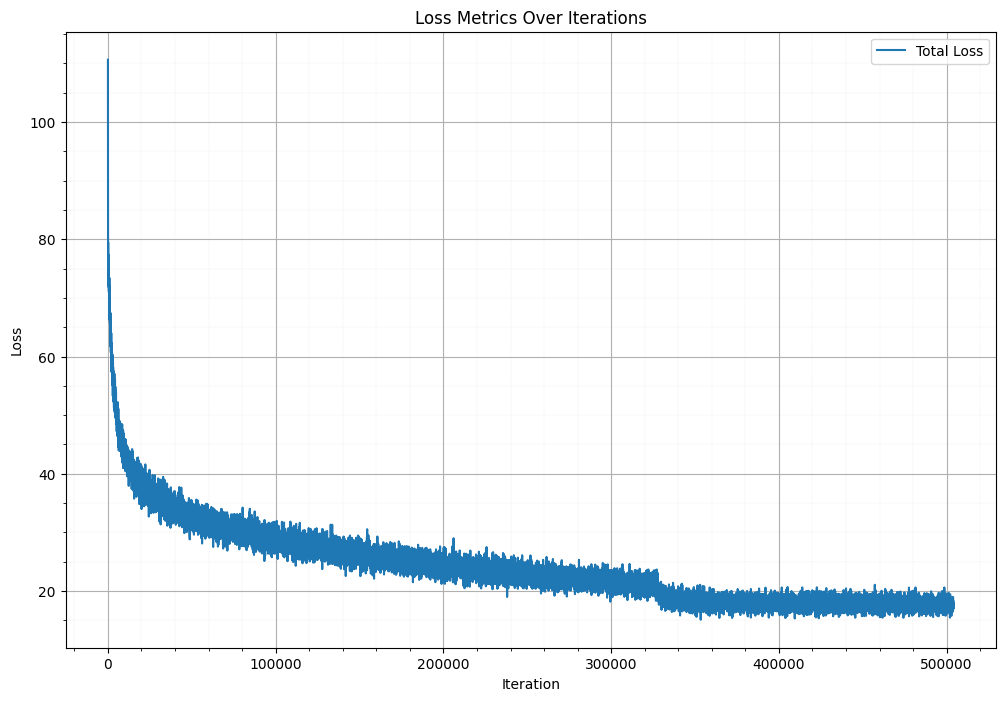

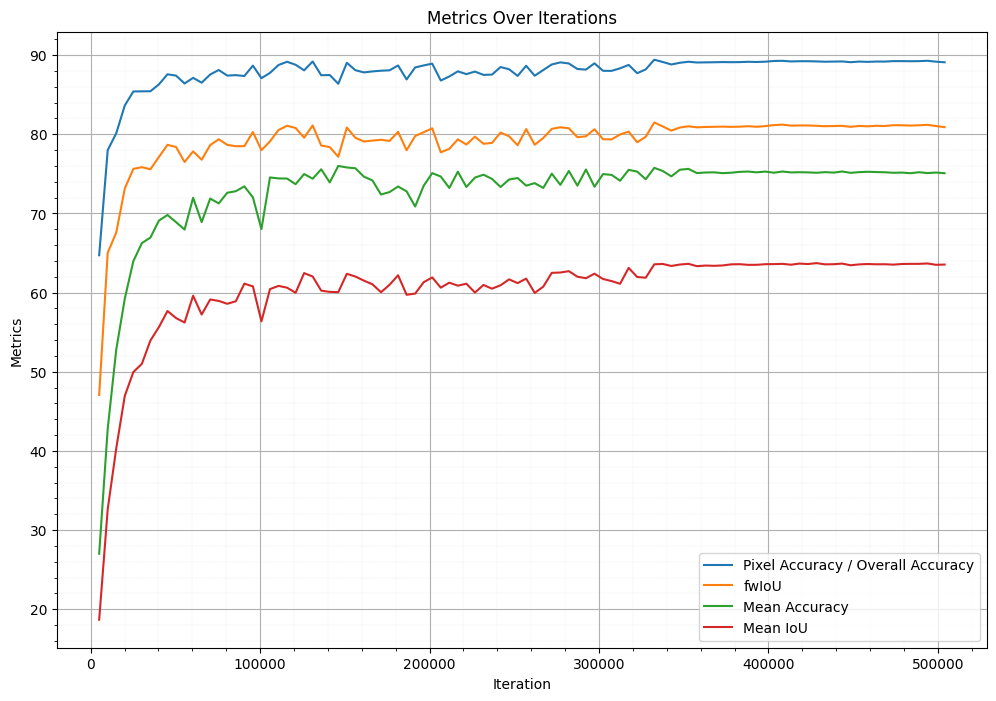

In [29]:
file_path = "/home/pablo.canosa/wip/Mask2Former/pruebas_cambio_pixel_decoder_NIRRGB_dataset_Francisco/metrics.json" # This is for mask2former with 4 bands 16 bit and the original transformer decoder, it is using tif files and 500x500 images
plot_losses_sem_seg(file_path)
plot_metrics_sem_seg(file_path)

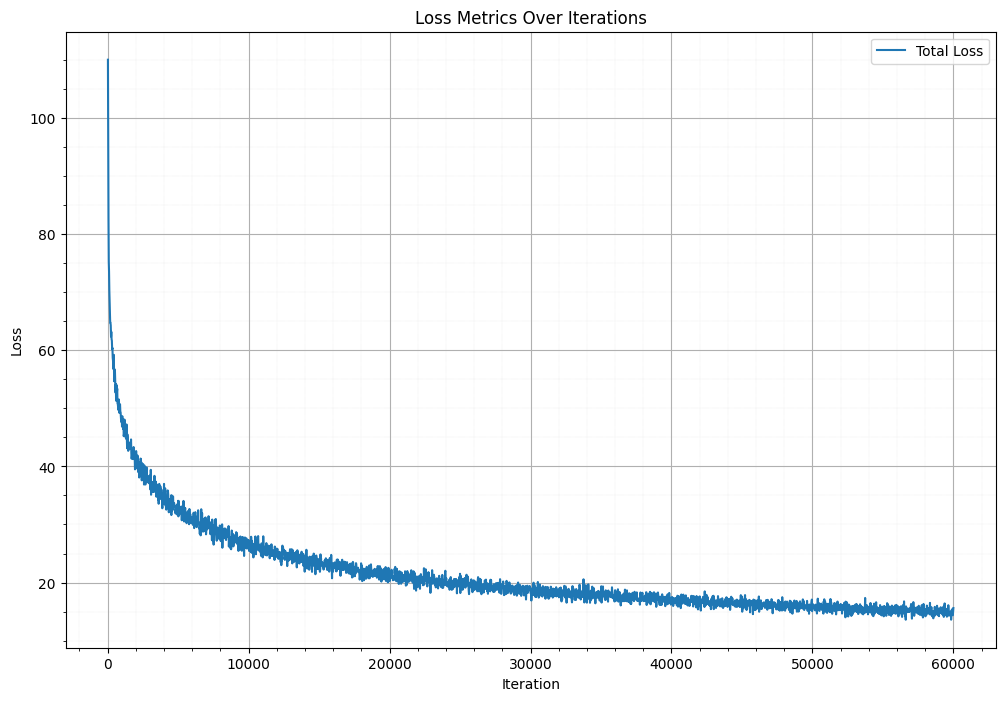

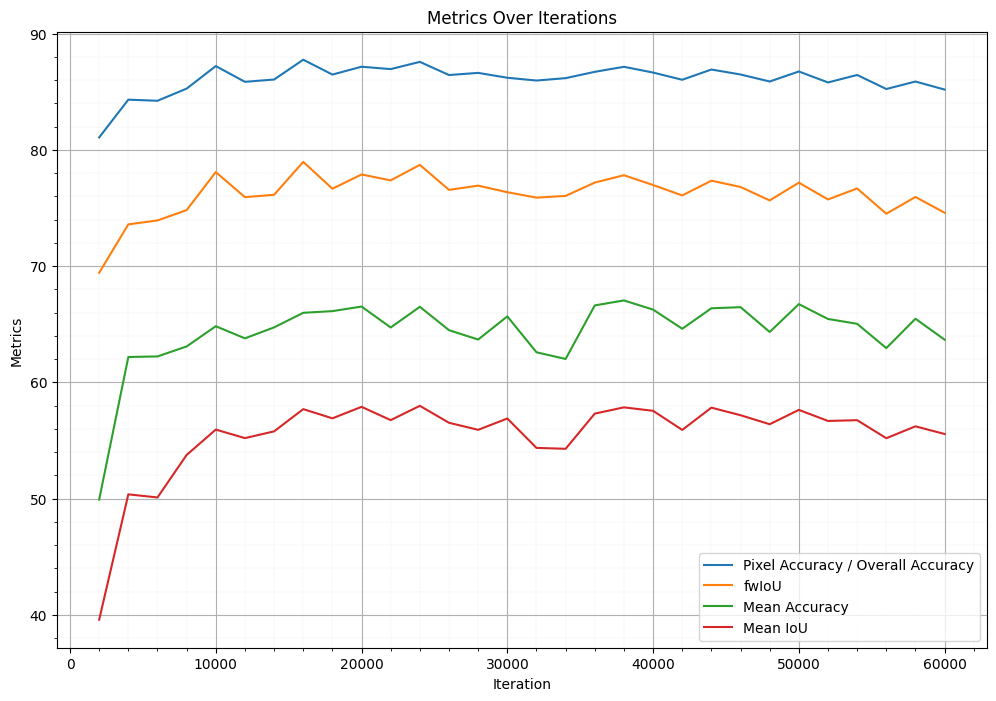

In [30]:
file_path = "/home/pablo.canosa/wip/Mask2Former/pruebas_cambio_pixel_decoder_RGB_swin_tiny/metrics.json" # This is for mask2former with 4 bands 16 bit and the original transformer decoder, it is using tif files and 500x500 images
plot_losses_sem_seg(file_path)
plot_metrics_sem_seg(file_path)

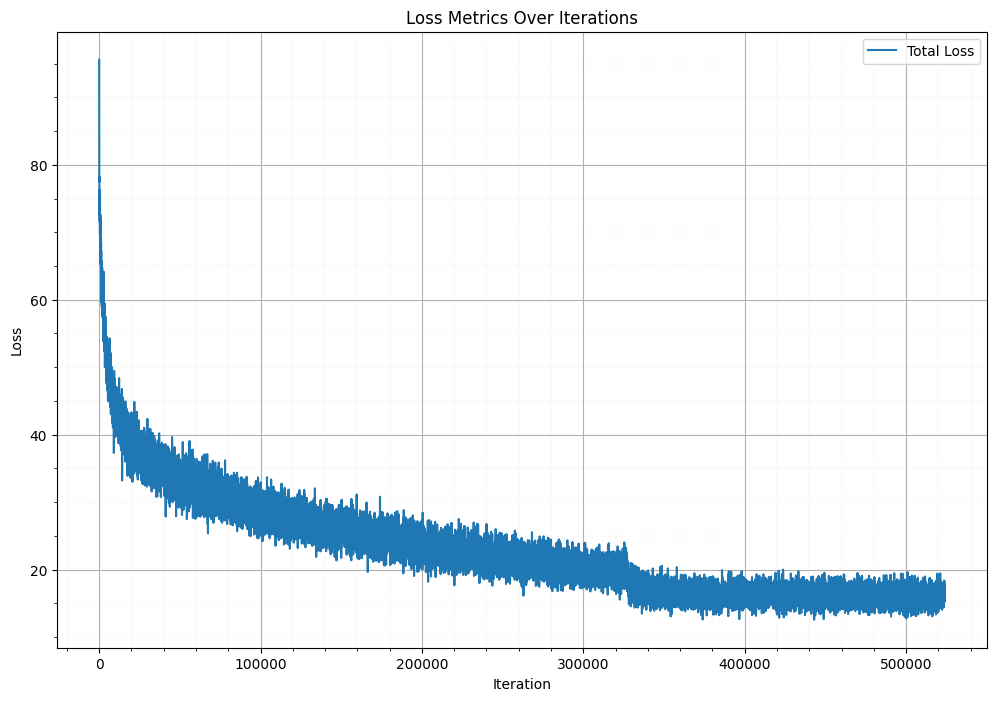

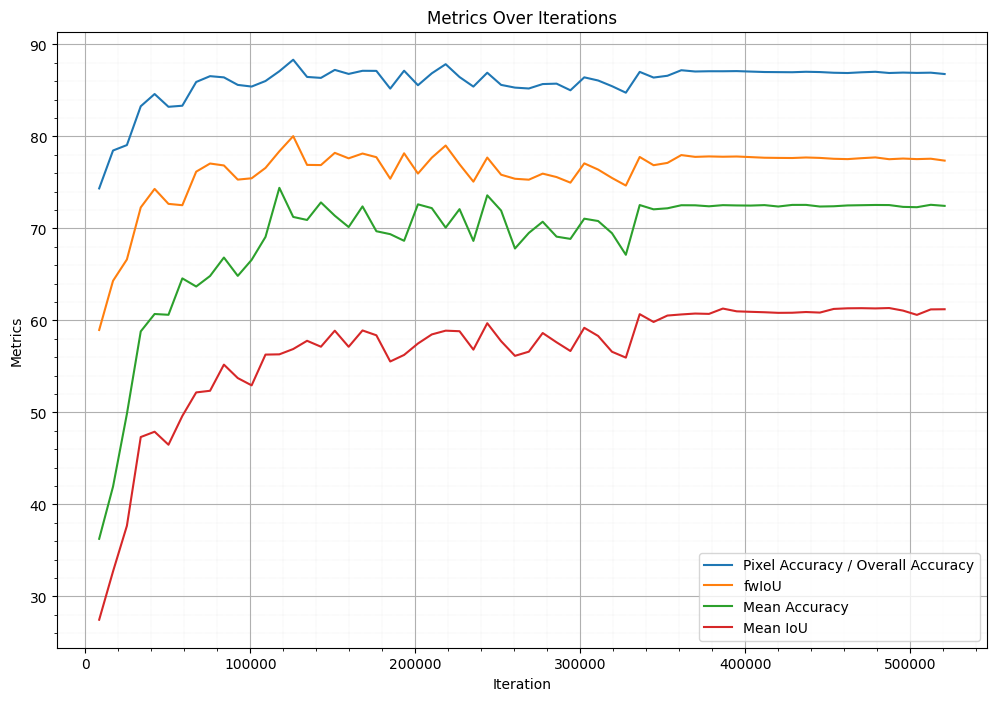

In [31]:

file_path = "/home/pablo.canosa/wip/Mask2Former/output_dataset_francisco_NIRRGB_BRA_SWIN_BASE/metrics.json" # This is for mask2former with 4 bands 16 bit and the original transformer decoder, it is using tif files and 500x500 images
plot_losses_sem_seg(file_path)
plot_metrics_sem_seg(file_path)

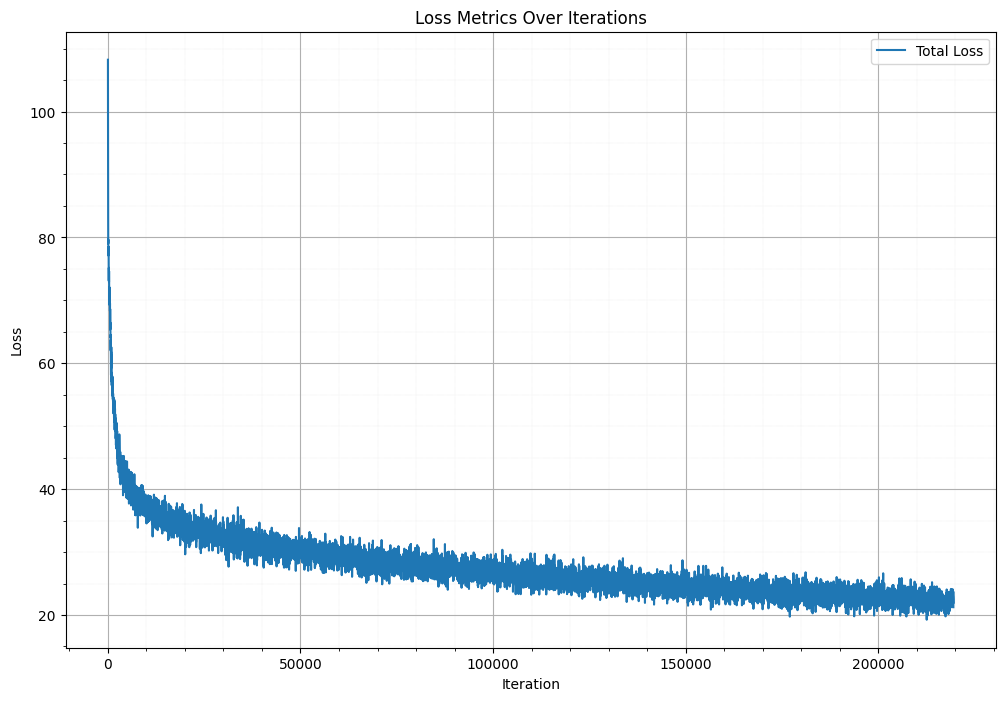

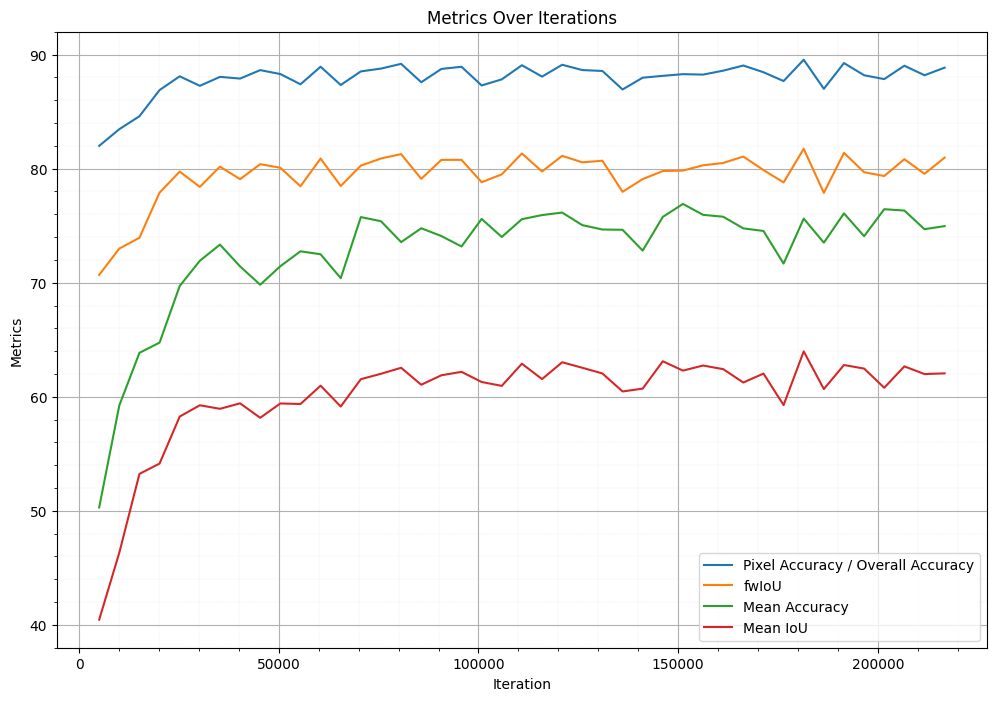

In [25]:
file_path = "/home/pablo.canosa/wip/Mask2Former/pruebas_cambio_pixel_decoder_Francisco_RGB_swin_tiny/metrics.json" # This is for mask2former with 4 bands 16 bit and the original transformer decoder, it is using tif files and 500x500 images
plot_losses_sem_seg(file_path)
plot_metrics_sem_seg(file_path)

# Resultados mask2former con el dataset de Francisco

Standard NIRRGB


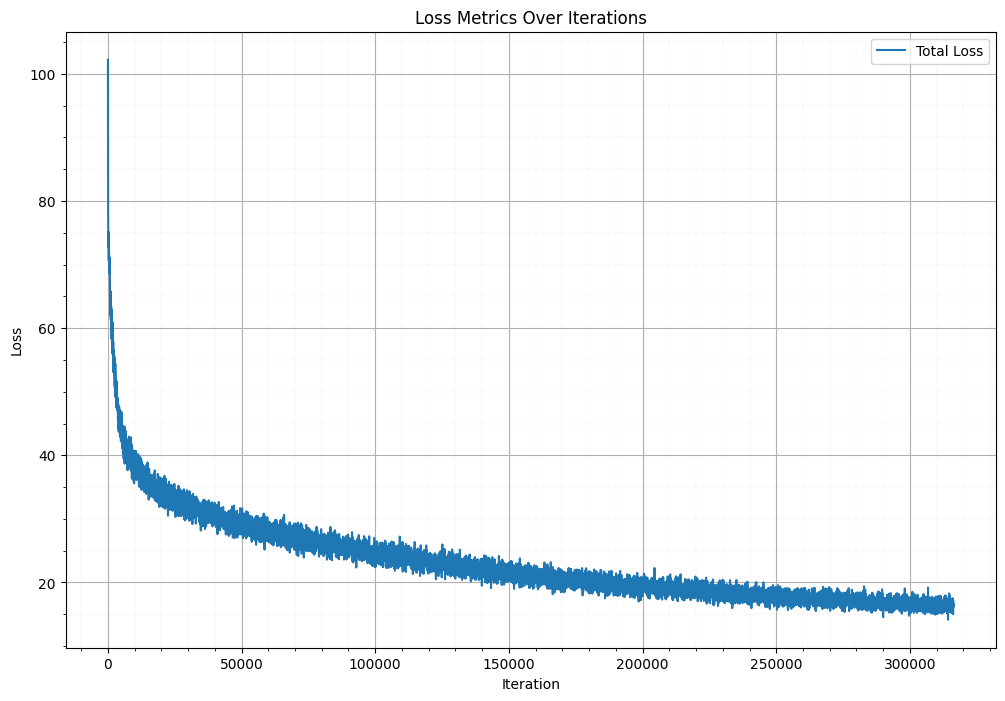

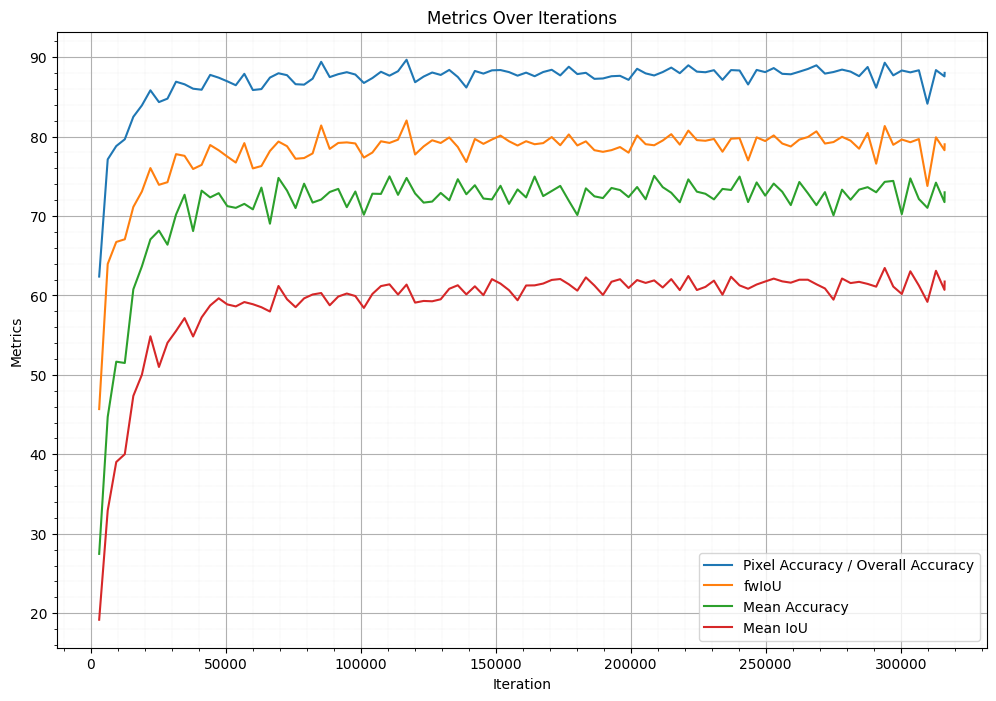

Standard RGB


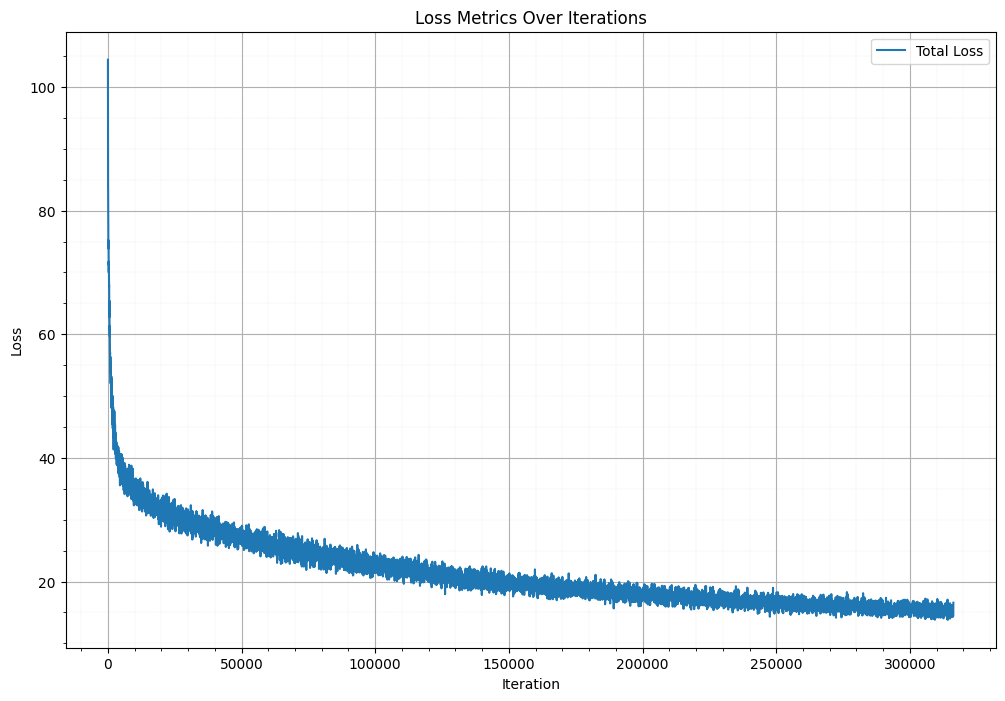

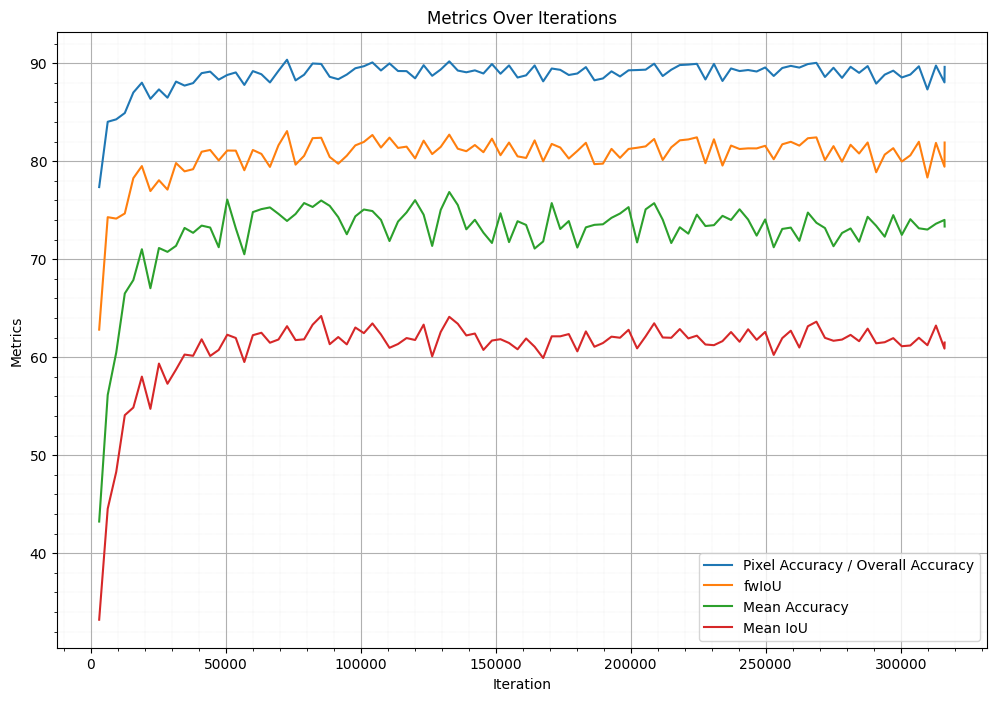

In [32]:
print("Standard NIRRGB")
file_path = "/home/pablo.canosa/wip/Mask2Former/output_dataset_francisco_NIRRGB_STANDARD/metrics.json" # This is for mask2former with 4 bands 16 bit and the original transformer decoder, it is using tif files and 500x500 images
plot_losses_sem_seg(file_path)
plot_metrics_sem_seg(file_path)

print("Standard RGB")
file_path = "/home/pablo.canosa/wip/Mask2Former/output_dataset_francisco_RGB_STANDARD/metrics.json" # This is for mask2former with 4 bands 16 bit and the original transformer decoder, it is using tif files and 500x500 images
plot_losses_sem_seg(file_path)
plot_metrics_sem_seg(file_path)


In [13]:
print("FAPN BRA RGB")
file_path = "/home/pablo.canosa/wip/Mask2Former/output_FAPN_BRA_RGB/metrics.json" # This is for mask2former with 4 bands 16 bit and the original transformer decoder, it is using tif files and 500x500 images
plot_losses_sem_seg(file_path)
plot_metrics_sem_seg(file_path)

FAPN BRA RGB


In [12]:
print("FAPN STANDARD RGB")
file_path = "/home/pablo.canosa/wip/Mask2Former/output_FAPN_NOBRA_RGB/metrics.json" # This is for mask2former with 4 bands 16 bit and the original transformer decoder, it is using tif files and 500x500 images
plot_losses_sem_seg(file_path)
plot_metrics_sem_seg(file_path)

FAPN STANDARD RGB


FAPN NIRRGB


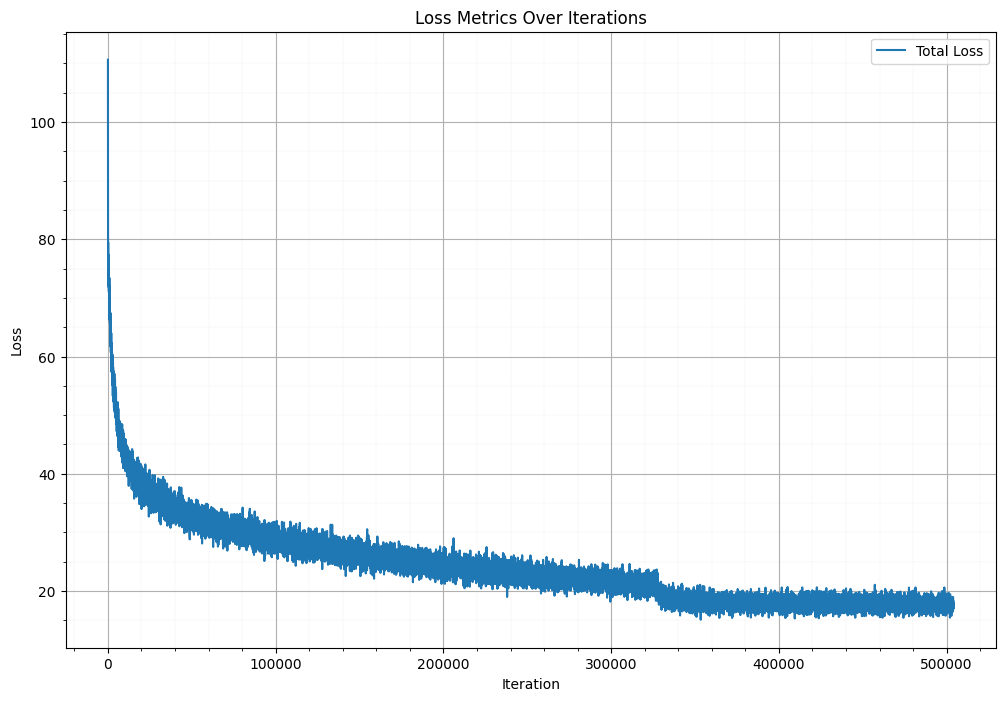

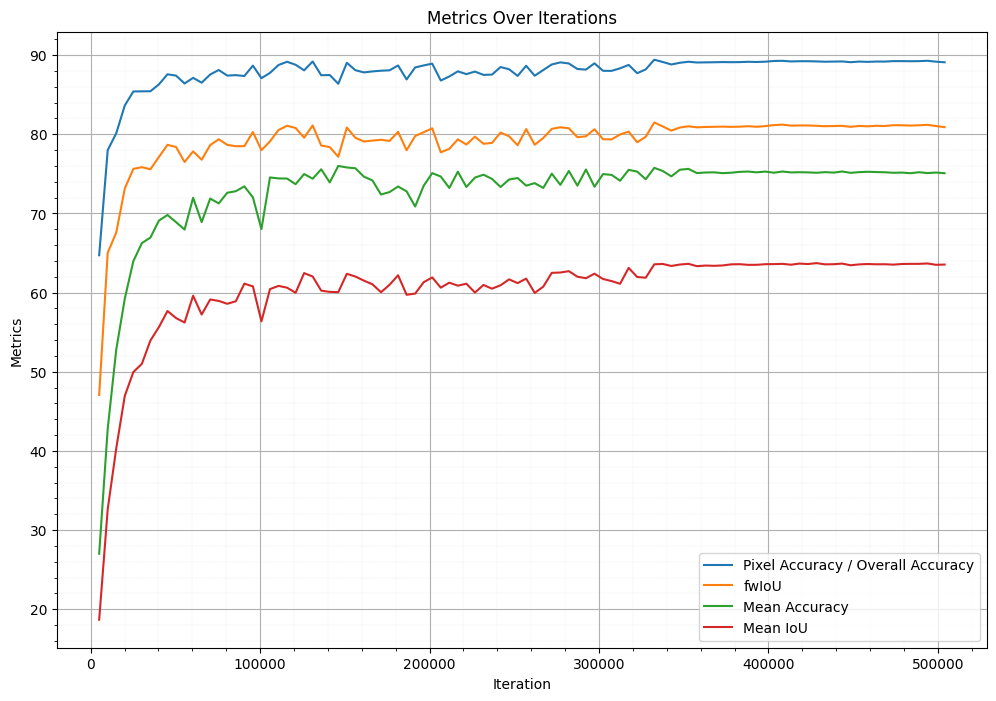

FAPN RGB


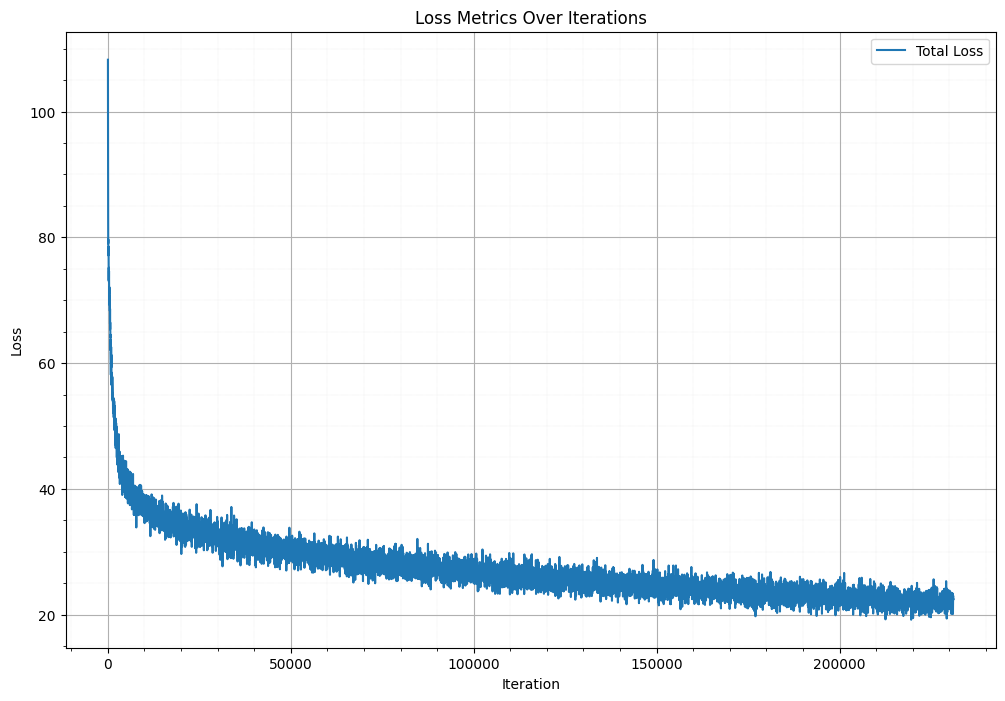

In [34]:
print("FAPN NIRRGB")
file_path = "/home/pablo.canosa/wip/Mask2Former/pruebas_cambio_pixel_decoder_NIRRGB_dataset_Francisco/metrics.json" # This is for mask2former with 4 bands 16 bit and the original transformer decoder, it is using tif files and 500x500 images
plot_losses_sem_seg(file_path)
plot_metrics_sem_seg(file_path)

print("FAPN RGB")
file_path = "/home/pablo.canosa/wip/Mask2Former/pruebas_cambio_pixel_decoder_Francisco_RGB_swin_tiny/metrics.json" # This is for mask2former with 4 bands 16 bit and the original transformer decoder, it is using tif files and 500x500 images
plot_losses_sem_seg(file_path)
plot_metrics_sem_seg(file_path)

In [3]:
path1 = "/home/pablo.canosa/Desktop/resultsCTCOMP/final_results/log_tiny_3k_NOBRA_120EP_metrics.json"
path2 = "/home/pablo.canosa/Desktop/resultsCTCOMP/final_results/log_tiny_3k_BRA_120EP_metrics.json"
#plot_losses_sem_seg_comparison("/home/pablo.canosa/wip/Mask2Former/output/metrics.json", "/home/pablo.canosa/Desktop/swin training/metrics.json")
plot_metrics_sem_seg_comparison(path1, path2)

In [42]:
print("NIRRGB Resnet 50 Original")  
file_path = "/home/pablo.canosa/wip/models_and_results/TFM-Models-Results/TOP_57k_iters_NIRRGB_results/output/metrics_untrimmed.json"
#plot_losses_sem_seg(file_path)
plot_metrics_sem_seg(file_path)

NIRRGB Resnet 50 Original


RGB Resnet 50 Original


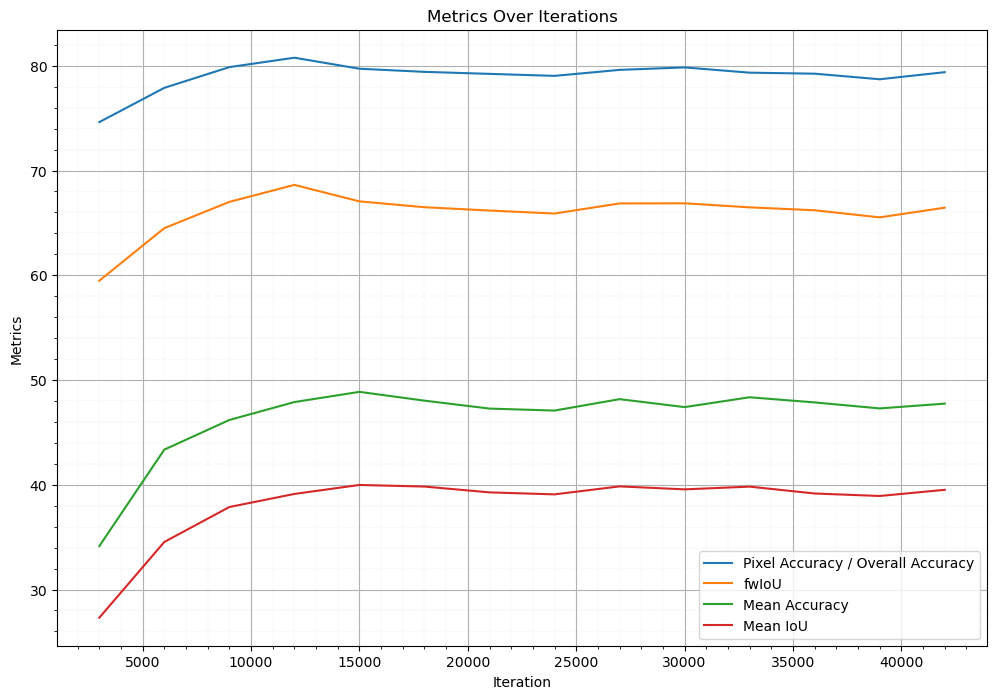

In [6]:
print("RGB Resnet 50 Original")  
file_path = "/home/pablo.canosa/wip/models_and_results/TFM-Models-Results/TOP_42k_iters_rgb_results/output/metrics.json"
#plot_losses_sem_seg(file_path)
plot_metrics_sem_seg(file_path)

# comparison to standard 3 band swin

NOBRA IS CONTINUOUS
BRA IS DOTTED


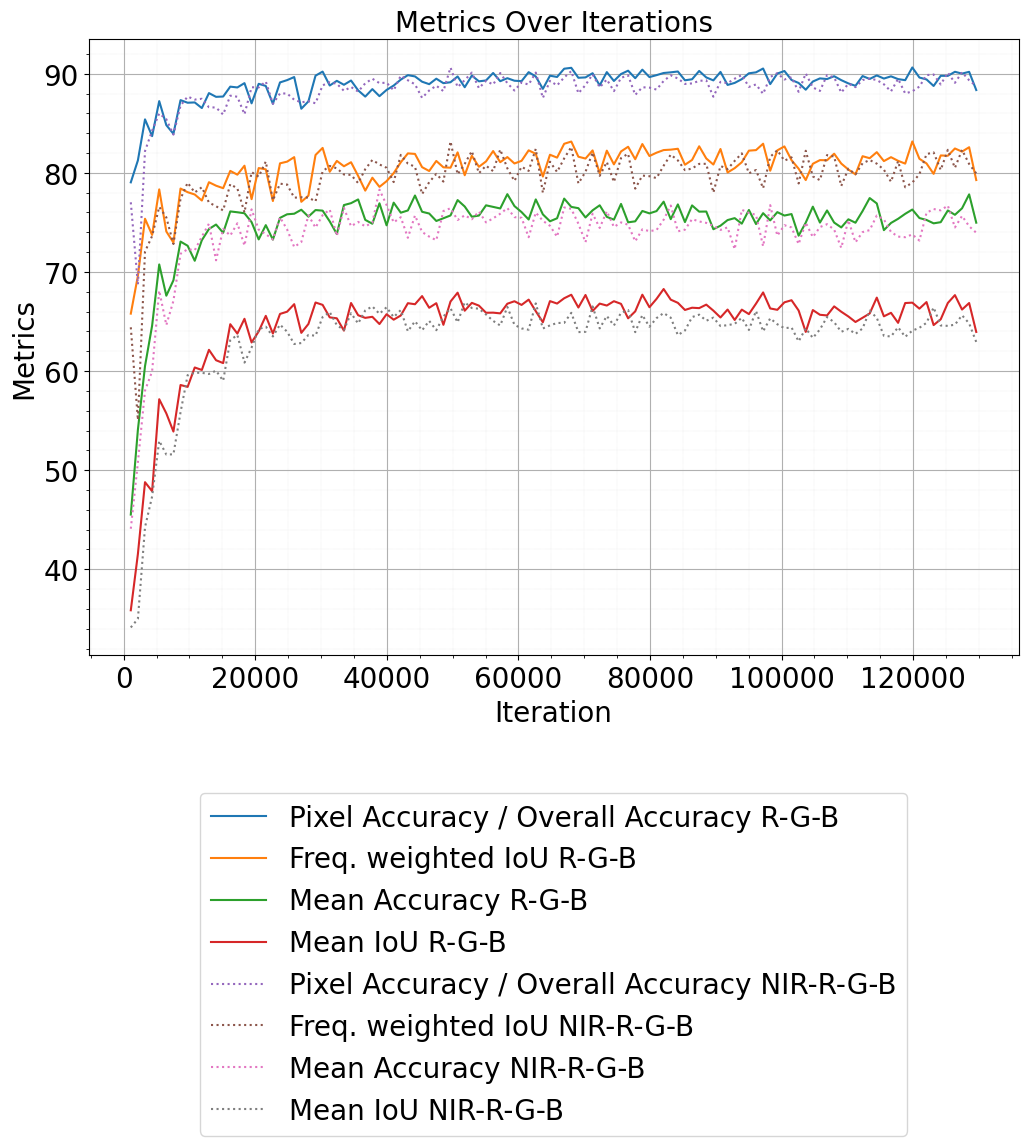

In [12]:
path1 = "/home/pablo.canosa/Desktop/resultsCTCOMP/metrics_tiny_NOBRA.json"
path2 = "/home/pablo.canosa/Desktop/resultsCTCOMP/metrics_tiny_BRA.json"
#plot_losses_sem_seg_comparison("/home/pablo.canosa/wip/Mask2Former/output/metrics.json", "/home/pablo.canosa/Desktop/swin training/metrics.json")
print("NOBRA IS CONTINUOUS")
print("BRA IS DOTTED")
plot_metrics_sem_seg_comparison(path1, path2)


NOBRA IS CONTINUOUS
BRA IS DOTTED


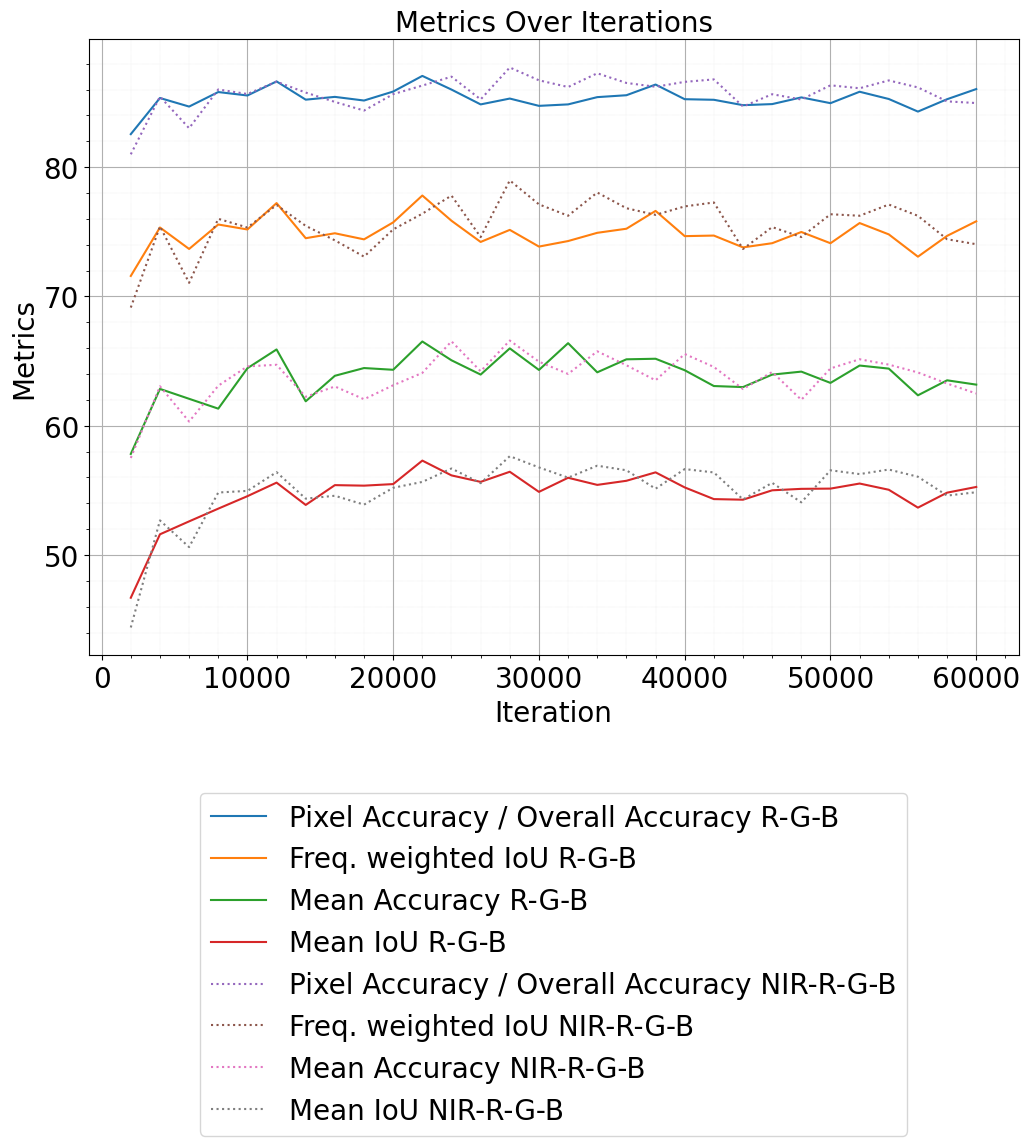

In [13]:
print("NOBRA IS CONTINUOUS")
print("BRA IS DOTTED")
path1 = "/home/pablo.canosa/Desktop/resultsCTCOMP/3k_pix_metrics_Nobra.json"
path2 = "/home/pablo.canosa/Desktop/resultsCTCOMP/3k_pix_metricsBRA.json"
#plot_losses_sem_seg_comparison("/home/pablo.canosa/wip/Mask2Former/output/metrics.json", "/home/pablo.canosa/Desktop/swin training/metrics.json")
plot_metrics_sem_seg_comparison(path1, path2)

NOBRA IS CONTINUOUS
BRA IS DOTTED


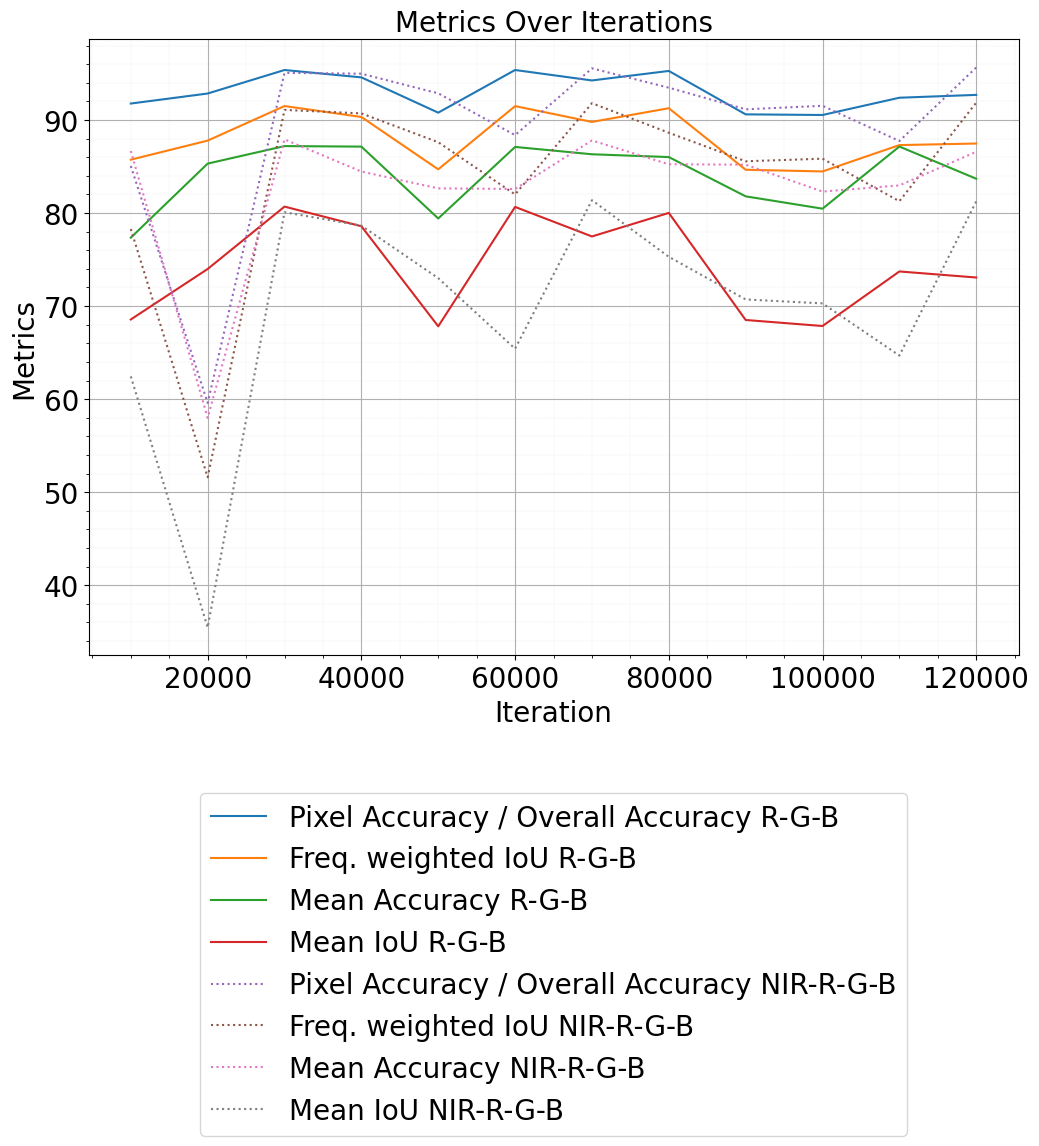

In [ ]:
print("NOBRA IS CONTINUOUS")
print("BRA IS DOTTED") # Me equivoque y lleva BRA con Query Fine Tuner, tengo que revisar
path1 = "/home/pablo.canosa/wip/Mask2Former/Output_pruebas_WHU_MIX_2/metrics.json"
path2 = "/home/pablo.canosa/wip/Mask2Former/Output_pruebas_WHU_MIX_2_BRA/metrics.json"
#plot_losses_sem_seg_comparison("/home/pablo.canosa/wip/Mask2Former/output/metrics.json", "/home/pablo.canosa/Desktop/swin training/metrics.json")
plot_metrics_sem_seg_comparison(path1, path2)

# 16 bit vs 8 bit

Skipping entry due to missing keys: {'iteration': 60000, 'sem_seg/ACC-airport': 71.71836698187356, 'sem_seg/ACC-arbor forest': 96.79036936439331, 'sem_seg/ACC-artificial meadow': 47.49375652461054, 'sem_seg/ACC-bareland': 70.14340953694838, 'sem_seg/ACC-dry cropland': 85.64607421423777, 'sem_seg/ACC-fish pond': 70.46733240805436, 'sem_seg/ACC-garden land': 39.79808320895983, 'sem_seg/ACC-industrial area': 75.35969878292212, 'sem_seg/ACC-irrigated field': 95.90058617033283, 'sem_seg/ACC-lake': 96.93580849582122, 'sem_seg/ACC-natural meadow': 89.14390762234967, 'sem_seg/ACC-overpass': 62.56034846218503, 'sem_seg/ACC-paddy field': 79.41600673384649, 'sem_seg/ACC-park': 30.585117265370553, 'sem_seg/ACC-pond': 24.418787582088306, 'sem_seg/ACC-railway station': 43.619226548993915, 'sem_seg/ACC-river': 71.85322358176968, 'sem_seg/ACC-road': 72.46679707411073, 'sem_seg/ACC-rural residential': 74.74099097203052, 'sem_seg/ACC-shrub forest': 12.93819651432774, 'sem_seg/ACC-snow': 77.2472936175865

FileNotFoundError: [Errno 2] No such file or directory: '/home/pablo.canosa/Desktop/swin training/metrics.json'

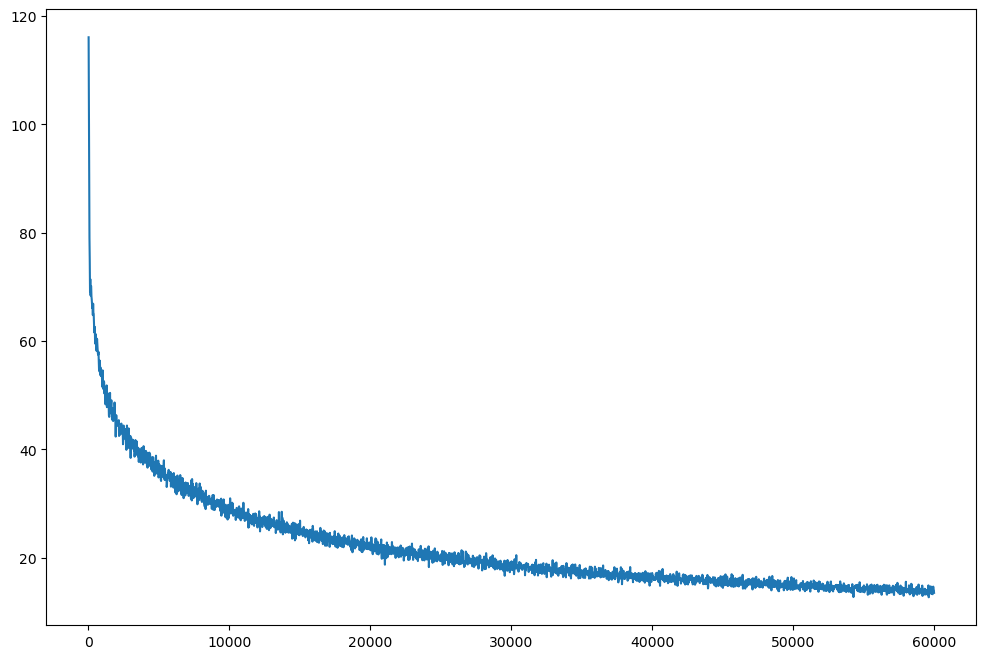

In [32]:
#16 bit rgb vs 8 bit rgb
plot_losses_sem_seg_comparison("/home/pablo.canosa/wip/16bit_trials/16bitRGB.json", "/home/pablo.canosa/Desktop/swin training/metrics.json")
plot_metrics_sem_seg_comparison("/home/pablo.canosa/wip/16bit_trials/16bitRGB.json", "/home/pablo.canosa/Desktop/swin training/metrics.json")

FileNotFoundError: [Errno 2] No such file or directory: '/home/pablo.canosa/Desktop/swin training/metrics.json'

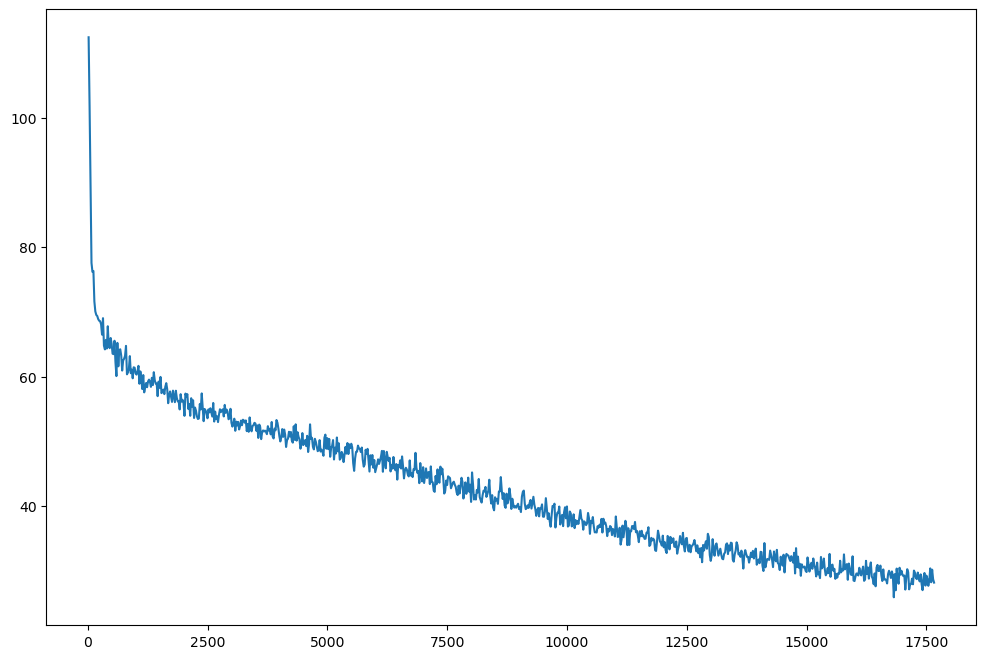

In [33]:
#16 bit rgb vs 8 bit rgb
plot_losses_sem_seg_comparison("/home/pablo.canosa/wip/Mask2Former/output/metrics.json", "/home/pablo.canosa/Desktop/swin training/metrics.json")
plot_metrics_sem_seg_comparison("/home/pablo.canosa/wip/Mask2Former/output/metrics.json", "/home/pablo.canosa/Desktop/swin training/metrics.json")

## Resnet 50 RGB vs. NIRRGB

FileNotFoundError: [Errno 2] No such file or directory: '/home/pablo.canosa/Desktop/swin training/metrics.json'

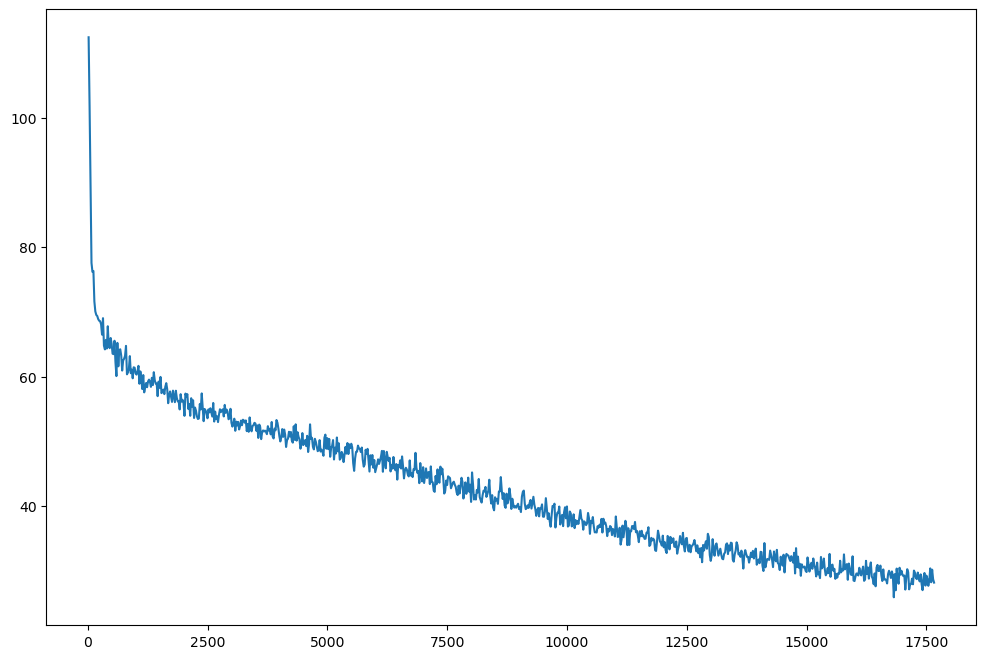

In [34]:
plot_losses_sem_seg_comparison("/home/pablo.canosa/wip/Mask2Former/output/metrics.json", "/home/pablo.canosa/Desktop/swin training/metrics.json")
plot_metrics_sem_seg_comparison("/home/pablo.canosa/wip/Mask2Former/output/metrics.json", "/home/pablo.canosa/Desktop/swin training/metrics.json")

## Resnet 50 RGB

In [35]:
#RGB
path = "/home/pablo.canosa/wip/models_and_results/TOP_42k_iters_rgb_results/output/metrics.json"
plot_losses_sem_seg(path)
plot_metrics_sem_seg(path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/pablo.canosa/wip/models_and_results/TOP_42k_iters_rgb_results/output/metrics.json'

# Resnet 50 NIRRGB

In [36]:
#NIR-RGB
path = "/home/pablo.canosa/wip/models_and_results/TOP_57k_iters_NIRRGB_results/output/metrics.json"
plot_losses_sem_seg(path)
plot_metrics_sem_seg(path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/pablo.canosa/wip/models_and_results/TOP_57k_iters_NIRRGB_results/output/metrics.json'

## Resnet 101 RGB

In [37]:
#RGB
path = "/home/pablo.canosa/wip/models_and_results/RESNET100-RGB/output/metrics.json"
plot_losses_sem_seg(path)
plot_metrics_sem_seg(path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/pablo.canosa/wip/models_and_results/RESNET100-RGB/output/metrics.json'

## Resnet 101 NIRRGB

In [39]:
#NIR-RGB
path = "/home/pablo.canosa/wip/models_and_results/RESNET100-NIRRGB/output/metrics.json"
plot_losses_sem_seg(path)
plot_metrics_sem_seg(path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/pablo.canosa/wip/models_and_results/RESNET100-NIRRGB/output/metrics.json'

## RESNET 50 RGB vs RGBNir class results

In [40]:
def plot_full_metrics(file_path, iteration):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            try:
                json_object = json.loads(line.strip())
                data.append(json_object)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON on line: {line}")
                print(e)

    # Filter data for the given iteration
    filtered_data = [entry for entry in data if entry.get('iteration') == iteration]

    if filtered_data:
        # Get the keys starting with "sem_seg"
        sem_seg_keys = [key for key in filtered_data[0].keys() if ("/ACC-" in key) or ("/IoU-" in key)]

        # Print the values for the filtered keys rounded to 2 decimals
        for key in sem_seg_keys:
            value = round(filtered_data[0][key], 2)
            print(f"{key}: {value}")
    else:
        print(f"No data found for iteration {iteration}")


In [41]:
plot_full_metrics("/home/pablo.canosa/wip/models_and_results/TOP_57k_iters_NIRRGB_results/output/metrics.json",29999)

FileNotFoundError: [Errno 2] No such file or directory: '/home/pablo.canosa/wip/models_and_results/TOP_57k_iters_NIRRGB_results/output/metrics.json'

In [42]:
plot_full_metrics("/home/pablo.canosa/wip/models_and_results/TOP_42k_iters_rgb_results/output/metrics.json",14999)

FileNotFoundError: [Errno 2] No such file or directory: '/home/pablo.canosa/wip/models_and_results/TOP_42k_iters_rgb_results/output/metrics.json'

# New version metrics

In [43]:
import json
import matplotlib.pyplot as plt

def plot_metrics_sem_seg_comparison(file_path_3band, file_path_4band):
    
    data_3band = []
    with open(file_path_3band, 'r') as f:
        for line in f:
            try:
                json_object = json.loads(line.strip())
                data_3band.append(json_object)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON on line: {line}")
                print(e)

    #print(data[250].keys())

    iterations = []
    pACC_3band = []
    fwIoU_3band = []
    mACC_3band = []
    mIoU_3band = []

    for entry in data_3band:
        if all(key in entry for key in ['iteration', 'sem_seg/pACC', 'sem_seg/fwIoU', 'sem_seg/mACC', 'sem_seg/mIoU',]):
            iterations.append(entry['iteration'])
            pACC_3band.append(entry['sem_seg/pACC'])
            mACC_3band.append(entry['sem_seg/mACC'])
            mIoU_3band.append(entry['sem_seg/mIoU'])
            #fwIoU_3band.append(entry['sem_seg/fwIoU'])
    plt.figure(figsize=(12, 8))

    plt.plot(iterations, pACC_3band, label='Pixel Accuracy / Overall Accuracy R-G-B')
    #plt.plot(iterations, fwIoU_3band, label='Freq. weighted IoU R-G-B')
    plt.plot(iterations, mACC_3band, label='Mean Accuracy R-G-B')
    plt.plot(iterations, mIoU_3band, label='Mean IoU R-G-B')

    data_4band = []

    with open(file_path_4band, 'r') as f:
        for line in f:
            try:
                json_object = json.loads(line.strip())
                data_4band.append(json_object)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON on line: {line}")
                print(e)

    #print(data[250].keys())

    iterations = []
    pACC_4band = []
    fwIoU_4band = []
    mACC_4band = []
    mIoU_4band = []

    for entry in data_4band:
        if all(key in entry for key in ['iteration', 'sem_seg/pACC', 'sem_seg/fwIoU', 'sem_seg/mACC', 'sem_seg/mIoU',]):
            iterations.append(entry['iteration'])
            pACC_4band.append(entry['sem_seg/pACC'])
            mACC_4band.append(entry['sem_seg/mACC'])
            mIoU_4band.append(entry['sem_seg/mIoU'])
            #fwIoU_4band.append(entry['sem_seg/fwIoU'])

    plt.plot(iterations, pACC_4band, label='Pixel Accuracy / Overall Accuracy NIR-R-G-B', linestyle='dotted')
    #plt.plot(iterations, fwIoU_4band, label='Freq. weighted IoU NIR-R-G-B', linestyle='dotted')
    plt.plot(iterations, mACC_4band, label='Mean Accuracy NIR-R-G-B', linestyle='dotted')
    plt.plot(iterations, mIoU_4band, label='Mean IoU NIR-R-G-B', linestyle='dotted')

    fontsize=20
    plt.xlabel('Iteration', fontsize=fontsize)
    plt.ylabel('Metrics', fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.title('Metrics Over Iterations', fontsize=fontsize)
    plt.legend(bbox_to_anchor=(0.5, -0.2), prop={'size': fontsize}, loc='upper center', ncol=1)
    plt.grid(True)
    plt.minorticks_on()
    plt.grid(True, which='minor', linestyle=':', linewidth=0.3, alpha=0.5)
    
    plt.show()


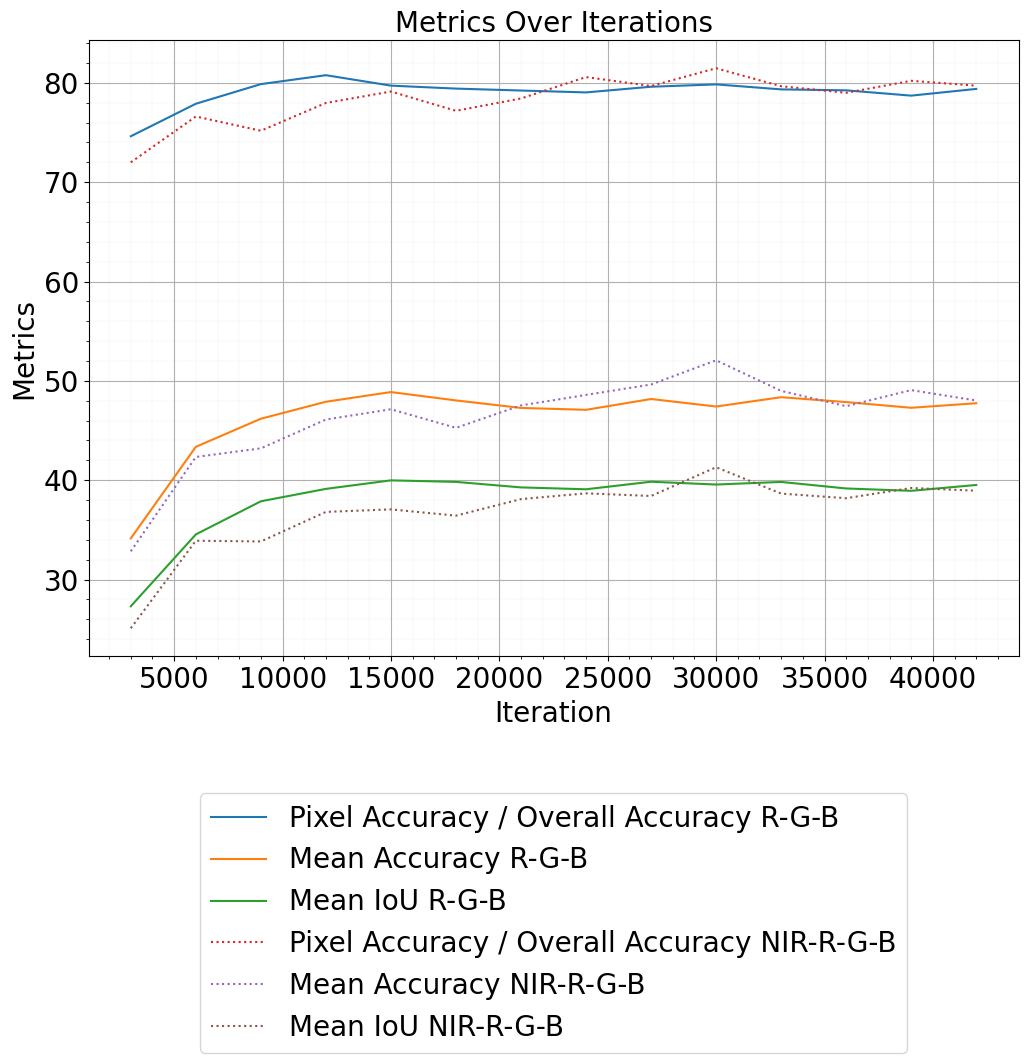

In [44]:
plot_metrics_sem_seg_comparison("/home/pablo.canosa/wip/models_and_results/TFM-Models-Results/TOP_42k_iters_rgb_results/output/metrics.json","/home/pablo.canosa/wip/models_and_results/TFM-Models-Results/TOP_57k_iters_NIRRGB_results/output/metrics.json")

In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
font = 35

def plot_metrics_sem_seg_comparison(file_path_3band, file_path_4band):
    # Set a professional color palette and style
    plt.style.use('ggplot')  # An alternative built-in style
    
    # Create a larger figure with higher DPI for better quality
    plt.figure(figsize=(20, 12), dpi=300)  # Increased figure size
    
    # Process 3-band data
    def process_data_file(file_path):
        data = []
        with open(file_path, 'r') as f:
            for line in f:
                try:
                    json_object = json.loads(line.strip())
                    data.append(json_object)
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON on line: {line}")
                    print(e)
        
        iterations = []
        metrics = {
            'pACC': [],
            #'fwIoU': [],
            #'mACC': [],
            'mIoU': []
        }
        
        for entry in data:
            if all(key in entry for key in ['iteration', 'sem_seg/pACC', 'sem_seg/fwIoU', 'sem_seg/mACC', 'sem_seg/mIoU']):
                iterations.append(entry['iteration'])
                metrics['pACC'].append(entry['sem_seg/pACC'])
                #metrics['fwIoU'].append(entry['sem_seg/fwIoU'])
                #metrics['mACC'].append(entry['sem_seg/mACC'])
                metrics['mIoU'].append(entry['sem_seg/mIoU'])
        
        return iterations, metrics
    
    # Process data for both 3-band and 4-band
    iterations_3band, metrics_3band = process_data_file(file_path_3band)
    iterations_4band, metrics_4band = process_data_file(file_path_4band)
    
    # Define color palette
    #colors = {
    #    '3band': ['#1F77B4', '#17BECF', '#FF7F0E', '#2CA02C'],
    #    '4band': ['#D62728', '#9467BD', '#8C564B', '#E377C2']
    #}

    colors = {
        '3band': ['#1F77B4', '#2CA02C'],
        '4band': ['#D62728', '#E377C2']
    }
    
    # Plot metrics
    #metrics_to_plot = ['pACC', 'fwIoU', 'mACC', 'mIoU']
    metrics_to_plot = ['pACC', 'mIoU']
    linestyles = {
        '3band': '-',
        '4band': '--'
    }
    
    plt.figure(figsize=(20, 12), dpi=300)  # Match the initial figure size
    
    for i, metric in enumerate(metrics_to_plot):
        plt.plot(iterations_3band, metrics_3band[metric], 
                 label=f'{metric} R-G-B', 
                 color=colors['3band'][i], 
                 linestyle=linestyles['3band'])
        
        plt.plot(iterations_4band, metrics_4band[metric], 
                 label=f'{metric} NIR-R-G-B', 
                 color=colors['4band'][i], 
                 linestyle=linestyles['4band'])
    
    # Improve formatting
    plt.xlabel('Iteration', fontsize=font, fontweight='bold')
    plt.ylabel('Metric Value', fontsize=font, fontweight='bold')
    #plt.title('Semantic Segmentation Metrics Comparison', fontsize=28, fontweight='bold')
    
    # Customize ticks
    plt.tick_params(axis='both', which='major', labelsize=30)
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(10))  # Limit number of x-ticks
    
    # Add grid with subtle styling
    plt.grid(True, linestyle='--', linewidth=1, color='gray', alpha=0.7)
    
    # Improved, larger legend
    plt.legend(
        bbox_to_anchor=(1.05, 1), 
        #loc='upper left', 
        borderaxespad=0., 
        fontsize=font,  # Increased font size
        title='Metrics',
        title_fontsize=font,  # Larger title font size
        frameon=True,  # Add a frame to the legend
        shadow=True,  # Add a shadow effect
        fancybox=True  # Rounded corners for the legend box
    )
    
    # Adjust layout to prevent cutting off labels
    plt.tight_layout()
    
    # Show plot
    plt.show()

# Example usage
# plot_metrics_sem_seg_comparison('path_to_3band_metrics.json', 'path_to_4band_metrics.json')

<Figure size 6000x3600 with 0 Axes>

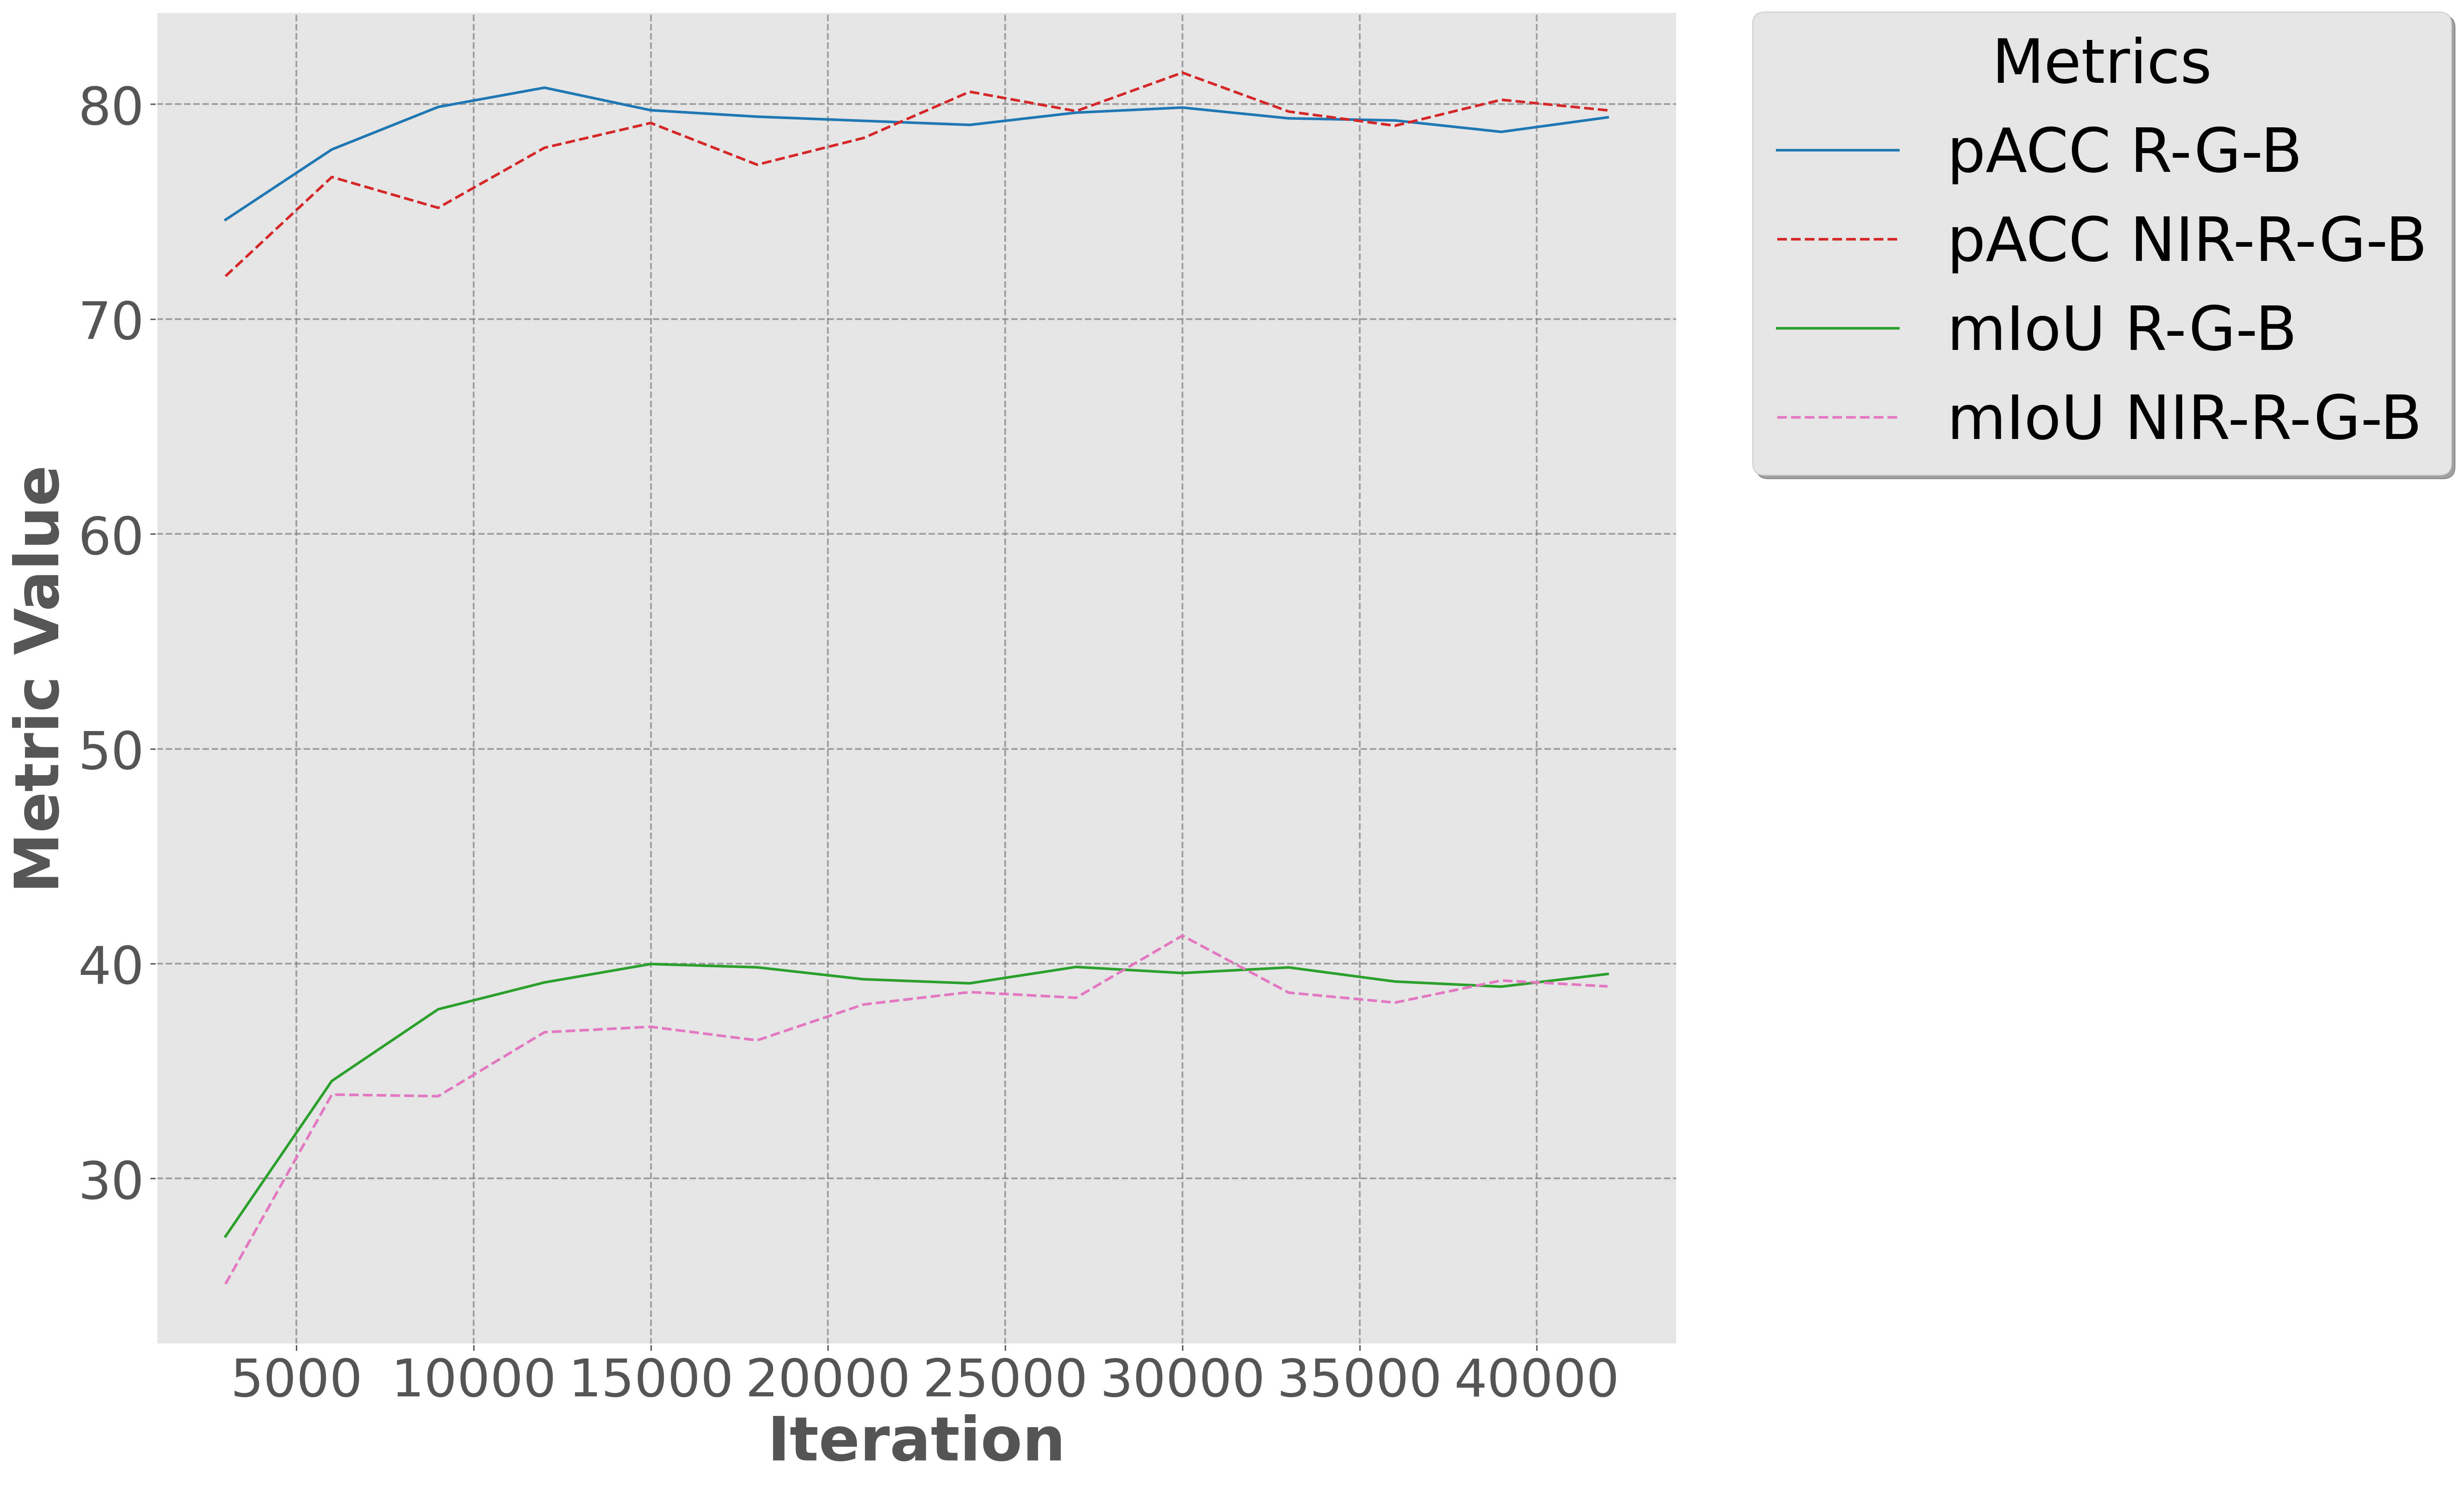

In [2]:
plot_metrics_sem_seg_comparison("/home/pablo.canosa/wip/models_and_results/TFM-Models-Results/TOP_42k_iters_rgb_results/output/metrics.json","/home/pablo.canosa/wip/models_and_results/TFM-Models-Results/TOP_57k_iters_NIRRGB_results/output/metrics.json")

# Last Graph

In [23]:
import json
import matplotlib.pyplot as plt


def plot_metrics_sem_seg_comparison(file_path_3band, file_path_4band):
    
    data_3band = []
    with open(file_path_3band, 'r') as f:
        for line in f:
            try:
                json_object = json.loads(line.strip())
                data_3band.append(json_object)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON on line: {line}")
                print(e)

    #print(data[250].keys())

    iterations = []
    pACC_3band = []
    #fwIoU_3band = []
    #mACC_3band = []
    mIoU_3band = []

    for entry in data_3band:
        if all(key in entry for key in ['iteration', 'sem_seg/pACC', 'sem_seg/fwIoU', 'sem_seg/mACC', 'sem_seg/mIoU',]):
            iterations.append(entry['iteration'])
            pACC_3band.append(entry['sem_seg/pACC'])
            #mACC_3band.append(entry['sem_seg/mACC'])
            mIoU_3band.append(entry['sem_seg/mIoU'])
            #fwIoU_3band.append(entry['sem_seg/fwIoU'])
    plt.figure(figsize=(12, 8))

    plt.plot(iterations, pACC_3band, label='Overall Accuracy R-G-B')
    #plt.plot(iterations, fwIoU_3band, label='Freq. weighted IoU R-G-B')
    #plt.plot(iterations, mACC_3band, label='Mean Accuracy R-G-B')
    plt.plot(iterations, mIoU_3band, label='Mean IoU R-G-B')

    data_4band = []

    with open(file_path_4band, 'r') as f:
        for line in f:
            try:
                json_object = json.loads(line.strip())
                data_4band.append(json_object)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON on line: {line}")
                print(e)

    #print(data[250].keys())

    iterations = []
    pACC_4band = []
    #fwIoU_4band = []
    #mACC_4band = []
    mIoU_4band = []

    for entry in data_4band:
        if all(key in entry for key in ['iteration', 'sem_seg/pACC', 'sem_seg/fwIoU', 'sem_seg/mACC', 'sem_seg/mIoU',]):
            iterations.append(entry['iteration'])
            pACC_4band.append(entry['sem_seg/pACC'])
            #mACC_4band.append(entry['sem_seg/mACC'])
            mIoU_4band.append(entry['sem_seg/mIoU'])
            #fwIoU_4band.append(entry['sem_seg/fwIoU'])

    plt.plot(iterations, pACC_4band, label='Overall Accuracy NIR-R-G-B', linestyle='dotted')
    #plt.plot(iterations, fwIoU_4band, label='Freq. weighted IoU NIR-R-G-B', linestyle='dotted')
    #plt.plot(iterations, mACC_4band, label='Mean Accuracy NIR-R-G-B', linestyle='dotted')
    plt.plot(iterations, mIoU_4band, label='Mean IoU NIR-R-G-B', linestyle='dotted')

    fontsize=20
    plt.xlabel('Iteration', fontsize=fontsize)
    plt.ylabel('Metrics', fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    #plt.title('Metrics Over Iterations', fontsize=fontsize)
    plt.legend(loc='lower right', prop={'size': fontsize}, ncol=2)
    plt.grid(True)
    plt.minorticks_on()
    plt.grid(True, which='minor', linestyle=':', linewidth=0.3, alpha=0.5)
    plt.tight_layout()  # Add this line before plt.show()
    plt.show()


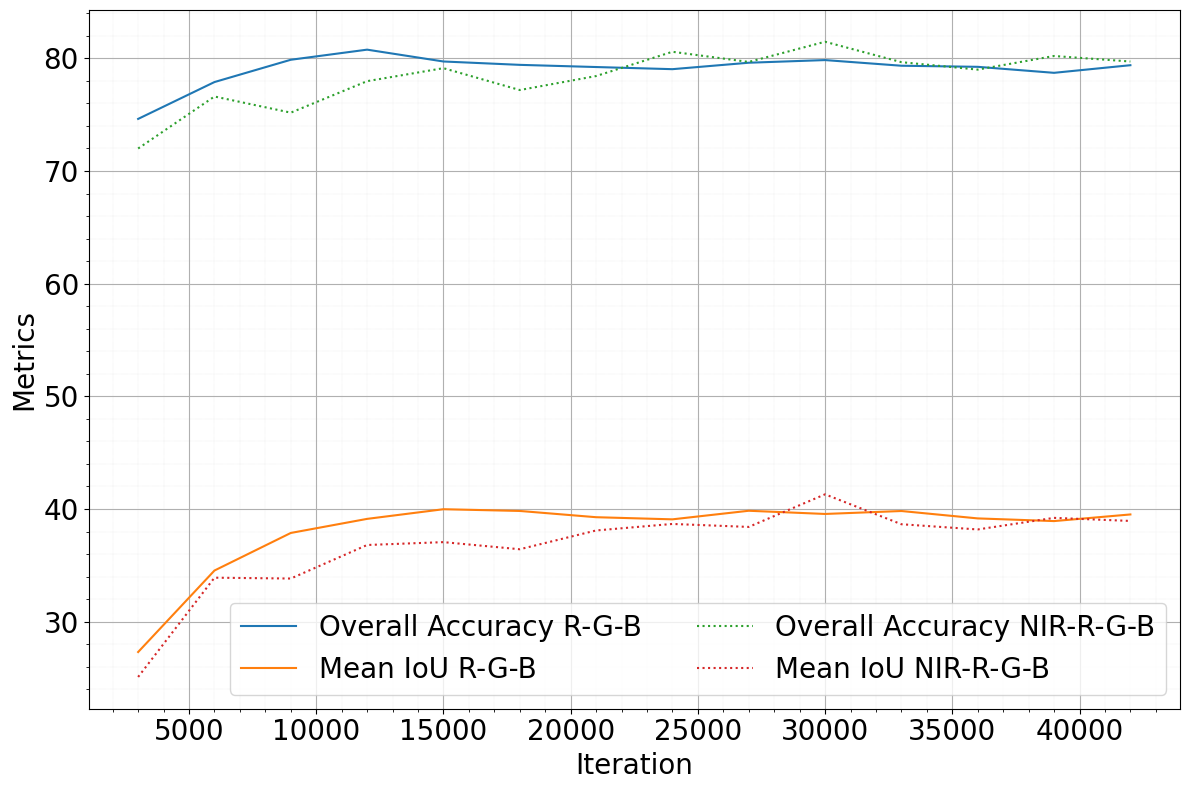

In [24]:
plot_metrics_sem_seg_comparison("/home/pablo.canosa/wip/models_and_results/TFM-Models-Results/TOP_42k_iters_rgb_results/output/metrics.json","/home/pablo.canosa/wip/models_and_results/TFM-Models-Results/TOP_57k_iters_NIRRGB_results/output/metrics.json")

# New claude version

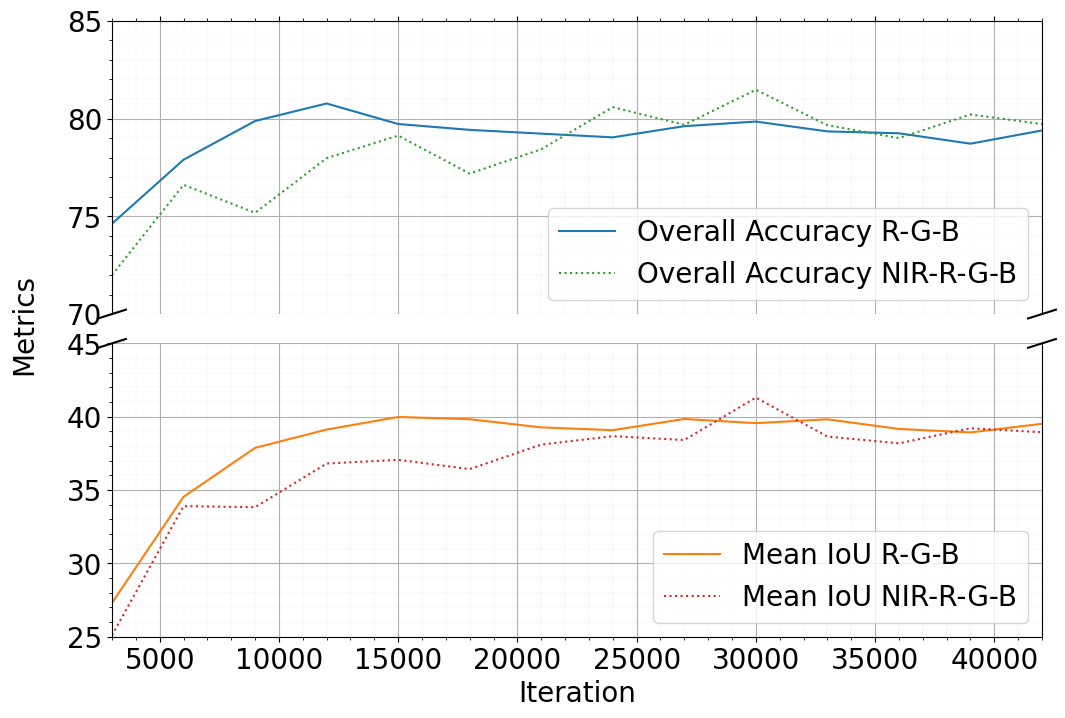

In [34]:
import json
import matplotlib.pyplot as plt
from matplotlib import gridspec

def plot_metrics_sem_seg_comparison(file_path_3band, file_path_4band):
    # Load 3-band data
    data_3band = []
    with open(file_path_3band, 'r') as f:
        for line in f:
            try:
                json_object = json.loads(line.strip())
                data_3band.append(json_object)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON on line: {line}")
                print(e)

    iterations = []
    pACC_3band = []
    mIoU_3band = []
    for entry in data_3band:
        if all(key in entry for key in ['iteration', 'sem_seg/pACC', 'sem_seg/fwIoU', 'sem_seg/mACC', 'sem_seg/mIoU']):
            iterations.append(entry['iteration'])
            pACC_3band.append(entry['sem_seg/pACC'])
            mIoU_3band.append(entry['sem_seg/mIoU'])

    # Load 4-band data
    data_4band = []
    with open(file_path_4band, 'r') as f:
        for line in f:
            try:
                json_object = json.loads(line.strip())
                data_4band.append(json_object)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON on line: {line}")
                print(e)

    iterations_4band = []
    pACC_4band = []
    mIoU_4band = []
    for entry in data_4band:
        if all(key in entry for key in ['iteration', 'sem_seg/pACC', 'sem_seg/fwIoU', 'sem_seg/mACC', 'sem_seg/mIoU']):
            iterations_4band.append(entry['iteration'])
            pACC_4band.append(entry['sem_seg/pACC'])
            mIoU_4band.append(entry['sem_seg/mIoU'])

    # Create figure with broken axis
    fig = plt.figure(figsize=(12, 8))
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])
    
    # Create two subplots
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    # Upper plot (70-85) - Overall Accuracy
    l1 = ax1.plot(iterations, pACC_3band, '-', color='#1f77b4', label='Overall Accuracy R-G-B')
    l2 = ax1.plot(iterations_4band, pACC_4band, ':', color='#2ca02c', label='Overall Accuracy NIR-R-G-B')

    # Lower plot (25-45) - Mean IoU
    l3 = ax2.plot(iterations, mIoU_3band, '-', color='#ff7f0e', label='Mean IoU R-G-B')
    l4 = ax2.plot(iterations_4band, mIoU_4band, ':', color='#d62728', label='Mean IoU NIR-R-G-B')

    # Set limits for the broken parts
    ax1.set_ylim(70, 85)  # Upper panel limits
    ax2.set_ylim(25, 45)  # Lower panel limits

    # Hide the spines between ax1 and ax2
    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=False)  # Don't put tick labels at the top
    ax2.xaxis.tick_bottom()

    # Add broken axis marks
    d = 0.015  # Size of diagonal lines
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)
    ax1.plot((1-d, 1+d), (-d, +d), **kwargs)

    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
    ax2.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

    # Customize the plots
    fontsize = 20
    ax2.set_xlabel('Iteration', fontsize=fontsize)
    fig.text(0.04, 0.5, 'Metrics', va='center', rotation='vertical', fontsize=fontsize)

    # Set ticks font size
    ax1.tick_params(axis='both', which='major', labelsize=fontsize)
    ax2.tick_params(axis='both', which='major', labelsize=fontsize)

    # Add grid to both plots
    for ax in [ax1, ax2]:
        ax.grid(True)
        ax.minorticks_on()
        ax.grid(True, which='minor', linestyle=':', linewidth=0.3, alpha=0.5)
        ax.set_xlim(min(iterations), max(iterations))  # Set same x-axis limits for both plots

    # Add single legend at the bottom
    legend_lines = [l3[0], l4[0]]
    legend_labels = ['Mean IoU R-G-B', 'Mean IoU NIR-R-G-B']
    ax2.legend(legend_lines, legend_labels,
              loc='lower right', prop={'size': fontsize}, ncol=1)
    
    legend_lines = [ l1[0], l2[0]]
    legend_labels = ['Overall Accuracy R-G-B', 'Overall Accuracy NIR-R-G-B',]
    ax1.legend(legend_lines, legend_labels,
              loc='lower right', prop={'size': fontsize}, ncol=1)

    # Adjust the layout
    plt.subplots_adjust(hspace=0.1)  # Reduce space between subplots
    
    plt.show()

plot_metrics_sem_seg_comparison("/home/pablo.canosa/wip/models_and_results/TFM-Models-Results/TOP_42k_iters_rgb_results/output/metrics.json","/home/pablo.canosa/wip/models_and_results/TFM-Models-Results/TOP_57k_iters_NIRRGB_results/output/metrics.json")
